# ROS Bag Data Exploration for Cleaning Robot

This notebook explores ROS bag data from a cleaning robot system. The bag file contains various topics organized by functional categories.

## Topic Categories and Data Types

### **Maps** (13 topics)
Map-related data including occupancy grids and costmaps:
- **Examples**: `/costmap_node/global_costmap/local_ogm_map`, `/costmap_node/global_costmap/costmap`
- **Data**: Occupancy grids with width, height, resolution, origin coordinates, and occupancy data arrays
- **Message Types**: `nav_msgs/msg/OccupancyGrid`, `map_msgs/msg/OccupancyGridUpdate`, `nav_msgs/msg/Path`

### **Localization & Pose** (7 topics)
Robot position and orientation data:
- **Examples**: `/localization/current_pose`, `/v5_current_pose`, `/localization/robot_status`
- **Data**: Position (x, y, z), orientation (quaternion), covariance matrices, frame IDs
- **Message Types**: `geometry_msgs/msg/PoseWithCovarianceStamped`, `std_msgs/msg/String`

### **Odometry** (3 topics)
Odometry data from wheel encoders:
- **Examples**: `/device/odom_data`, `/odom`, `/device/odom_status`
- **Data**: Wheel encoder counts (left/right), delta counts, position, velocity, timestamps
- **Message Types**: `nav_msgs/msg/Odometry`, `diagnostic_msgs/msg/DiagnosticStatus`

### **Control & Commands** (7 topics)
Control commands sent to the robot:
- **Examples**: `/chassis_cmd_vel`, `/device_controller/inspect_cleaning_ability`, `/eco_control/path_follow_state`
- **Data**: Linear/angular velocities, cleaning mode configurations, path following states
- **Message Types**: `geometry_msgs/msg/Twist`, `std_msgs/msg/String`, `eco_sys/msg/PathFollowState`

### **Device & Sensors** (10 topics)
Device status and sensor data:
- **Examples**: `/device/imu_data`, `/device/health_status`, `/console/device_status`
- **Data**: IMU data (orientation, angular velocity, acceleration), device health status, battery information, motor status
- **Message Types**: `diagnostic_msgs/msg/DiagnosticStatus`, `std_msgs/msg/String`, `std_msgs/msg/UInt32`

### **Scrubber & Cleaning** (4 topics)
Scrubber and cleaning system status:
- **Examples**: `/device/scrubber_status`, `/device/detailed_scrubber_status`, `/device/scrubber/health_status`
- **Data**: Brush status (86+ Key-Value pairs including: brush motor state, usage levels, cleaning modes, water usage, squeegee status, etc.)
- **Message Types**: `diagnostic_msgs/msg/DiagnosticStatus`

### **Protection & Safety** (5 topics)
Protector and safety system data:
- **Examples**: `/device/protector`, `/protector_hit`, `/elastic_wall_flag`
- **Data**: Protector sensor data, hit detection, elastic wall status flags
- **Message Types**: `diagnostic_msgs/msg/KeyValue`, `std_msgs/msg/String`, `std_msgs/msg/UInt8`

### **Navigation & Path** (2 topics)
Path planning and following state:
- **Examples**: `/eco_decision/path_follow_state`, `/eco_planning/path_follow_state`
- **Data**: Path execution state, follow index, thread state, decision command states
- **Message Types**: `eco_sys/msg/PathFollowState`

### **Perception & Objects** (7 topics)
Object detection and perception data:
- **Examples**: `/depthcam_fusion_objects`, `/ssd_ros/bounding_boxes`, `/perc/general_objects_static`
- **Data**: Detected objects (type, position, tracking time, convex hull), bounding boxes, visual markers
- **Message Types**: `common_services/msg/ObjectLists`, `perception_msgs/msg/BoundingBoxes`, `visualization_msgs/msg/MarkerArray`

### **Diagnostic & Status** (6 topics)
System diagnostic and status messages:
- **Examples**: `/checker/node_beats`, `/console/status`, `/gs_work_station/workstation_status`
- **Data**: Node heartbeat status, status codes, workstation status with Key-Value pairs
- **Message Types**: `diagnostic_msgs/msg/KeyValue`, `diagnostic_msgs/msg/KeyValueArray`, `std_msgs/msg/String`

### **Workstation** (2 topics)
Workstation status and control:
- **Examples**: `/gs_work_station/workstation_status`, `/work_station_controller/status`
- **Data**: Workstation status with multiple Key-Value pairs (add_water_timeout, etc.)
- **Message Types**: `autoscrubber_services/msg/KeyValueArray`

### **Transform (TF)** (1 topic)
Coordinate frame transformations:
- **Example**: `/tf`
- **Data**: Transformations between frames (e.g., base_odom → base_link) with translation and rotation
- **Message Types**: `tf2_msgs/msg/TFMessage`

### **System & Logging** (1 topic)
System logs and messages:
- **Example**: `/rosout`
- **Data**: ROS log messages with level, name, message content, file, function, line number
- **Message Types**: `rosgraph_msgs/msg/Log`

In [1]:
from datetime import datetime
import pandas as pd
import json

In [2]:
def list_topics(reader):
    print("=== Available topics ===")
    for conn in reader.connections:
        print(f"{conn.topic} ({conn.msgtype})")

def explore_topic(reader, topic_name, max_messages=3):
    for conn, ts, raw in reader.messages():
        if conn.topic == topic_name:
            msg = reader.deserialize(raw, conn.msgtype)
            # convert timestamp to human readable format
            # convert nanoseconds to seconds
            ts = ts / 1e9
            human_readable_time = datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
            print(f"\n⏱ {human_readable_time}")
            print(msg)
            max_messages -= 1
            if max_messages <= 0:
                break

In [3]:
#pip install rosbags
from pathlib import Path
from rosbags.highlevel import AnyReader

# Path to your bag file (use pathlib.Path)
bag_path = Path('/Users/jiaxuchen/Downloads/GS_2025-11-05-07-53-09_609.bag')
reader = AnyReader([Path(bag_path)])
reader.open()

In [4]:
# list_topics(reader)

In [5]:
# Get all unique topics
unique_topics = {}
for conn in reader.connections:
    if conn.topic not in unique_topics:
        unique_topics[conn.topic] = conn.msgtype

print(f"Found {len(unique_topics)} unique topics:")
for topic, msgtype in sorted(unique_topics.items()):
    print(f"  - {topic} ({msgtype})")

Found 71 unique topics:
  - /chassis_cmd_vel (geometry_msgs/msg/Twist)
  - /checker/node_beats (diagnostic_msgs/msg/KeyValue)
  - /console/device_status (std_msgs/msg/String)
  - /console/status (std_msgs/msg/String)
  - /costmap/elastic_virtual_wall/his_traj (nav_msgs/msg/Path)
  - /costmap_node/b_near_danger_area (std_msgs/msg/Bool)
  - /costmap_node/b_near_drop_ignore_area (std_msgs/msg/Bool)
  - /costmap_node/clean_footprint_master (geometry_msgs/msg/PolygonStamped)
  - /costmap_node/global_costmap/costmap (nav_msgs/msg/OccupancyGrid)
  - /costmap_node/global_costmap/costmap_updates (map_msgs/msg/OccupancyGridUpdate)
  - /costmap_node/global_costmap/local_costmap (nav_msgs/msg/OccupancyGrid)
  - /costmap_node/global_costmap/local_ogm_map (nav_msgs/msg/OccupancyGrid)
  - /costmap_node/global_costmap/local_virtual_wall_map (nav_msgs/msg/OccupancyGrid)
  - /costmap_node/global_costmap/realtime_staitc_inflation_map (nav_msgs/msg/OccupancyGrid)
  - /costmap_node/global_costmap/realtime_

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to print raw message representation
def print_raw_message(msg, max_length=500):
    """Print raw message representation"""
    try:
        print(f"\n  === Raw Message Representation ===")
        msg_repr = repr(msg)
        if len(msg_repr) > max_length:
            print(f"    {msg_repr[:max_length]}...")
            print(f"    (truncated, full length: {len(msg_repr)} characters)")
        else:
            print(f"    {msg_repr}")
    except Exception as e:
        print(f"    Could not get representation: {e}")

# Individual message type handlers
def handle_occupancy_grid_update(msg, topic_name, message_count):
    """Handle OccupancyGridUpdate messages"""
    try:
        print(f"  Update region: x={msg.x}, y={msg.y}, width={msg.width}, height={msg.height}")
        print(f"  Data size: {len(msg.data)}")
        if message_count == 0 and len(msg.data) > 0:
            try:
                data = np.array(msg.data).reshape((msg.height, msg.width))
                plt.figure(figsize=(10, 8))
                plt.imshow(data, cmap='gray', origin='lower')
                plt.title(f"OccupancyGridUpdate: {topic_name}\nUpdate region at ({msg.x}, {msg.y})")
                plt.colorbar(label='Occupancy')
                plt.show()
            except Exception as e:
                print(f"  Could not visualize: {e}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling OccupancyGridUpdate: {e}")

def handle_occupancy_grid(msg, topic_name, message_count):
    """Handle OccupancyGrid messages"""
    try:
        print(f"  Width: {msg.info.width}, Height: {msg.info.height}")
        print(f"  Resolution: {msg.info.resolution}")
        print(f"  Origin: x={msg.info.origin.position.x:.3f}, y={msg.info.origin.position.y:.3f}")
        if message_count == 0:
            try:
                data = np.array(msg.data).reshape((msg.info.height, msg.info.width))
                plt.figure(figsize=(10, 8))
                plt.imshow(data, cmap='gray', origin='lower')
                plt.title(f"OccupancyGrid: {topic_name}")
                plt.colorbar(label='Occupancy')
                plt.show()
            except Exception as e:
                print(f"  Could not visualize: {e}")
        print_raw_message(msg, max_length=300)  # OccupancyGrid can be very large, so truncate more
    except Exception as e:
        print(f"  Error handling OccupancyGrid: {e}")

def handle_pose_with_covariance_stamped(msg, topic_name, message_count):
    """Handle PoseWithCovarianceStamped messages"""
    try:
        pose = msg.pose.pose
        print(f"  Position: x={pose.position.x:.3f}, y={pose.position.y:.3f}, z={pose.position.z:.3f}")
        print(f"  Orientation: x={pose.orientation.x:.3f}, y={pose.orientation.y:.3f}, "
              f"z={pose.orientation.z:.3f}, w={pose.orientation.w:.3f}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling PoseWithCovarianceStamped: {e}")

def handle_odometry(msg, topic_name, message_count):
    """Handle Odometry messages"""
    try:
        pose = msg.pose.pose
        twist = msg.twist.twist
        print(f"  Position: x={pose.position.x:.3f}, y={pose.position.y:.3f}")
        print(f"  Linear velocity: x={twist.linear.x:.3f}, y={twist.linear.y:.3f}")
        print(f"  Angular velocity: z={twist.angular.z:.3f}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling Odometry: {e}")

def handle_twist(msg, topic_name, message_count):
    """Handle Twist messages"""
    try:
        print(f"  Linear: x={msg.linear.x:.3f}, y={msg.linear.y:.3f}, z={msg.linear.z:.3f}")
        print(f"  Angular: x={msg.angular.x:.3f}, y={msg.angular.y:.3f}, z={msg.angular.z:.3f}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling Twist: {e}")

def handle_tf_message(msg, topic_name, message_count):
    """Handle TFMessage messages"""
    try:
        print(f"  Number of transforms: {len(msg.transforms)}")
        for i, transform in enumerate(msg.transforms):
            print(f"    Transform {i+1}: {transform.header.frame_id} -> {transform.child_frame_id}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling TFMessage: {e}")

def handle_diagnostic_status(msg, topic_name, message_count):
    """Handle DiagnosticStatus messages - show all details"""
    try:
        print(f"  Level: {msg.level} ({'OK' if msg.level == 0 else 'WARN' if msg.level == 1 else 'ERROR' if msg.level == 2 else 'STALE' if msg.level == 3 else 'UNKNOWN'})")
        print(f"  Name: {msg.name}")
        print(f"  Message: {msg.message}")

        # Check for values attribute - show ALL key-value pairs
        if hasattr(msg, 'values'):
            if msg.values and len(msg.values) > 0:
                print(f"\n  Key-Value pairs ({len(msg.values)} total):")
                for i, kv in enumerate(msg.values, 1):
                    # Try to format the value nicely
                    value_str = str(kv.value)
                    # If it's a long string, truncate it
                    if len(value_str) > 100:
                        value_str = value_str[:100] + "..."
                    print(f"    {i}. {kv.key}: {value_str}")
            else:
                print(f"  Values: (empty or None)")
                # Try to see if values is a list or something else
                try:
                    if hasattr(msg.values, '__len__'):
                        print(f"    Values type: {type(msg.values)}, length: {len(msg.values) if hasattr(msg.values, '__len__') else 'N/A'}")
                except:
                    pass
        else:
            print(f"  Note: No 'values' attribute found")

        # Check for other potential attributes that might contain data
        if hasattr(msg, 'hardware_id'):
            print(f"  Hardware ID: {msg.hardware_id}")
        if hasattr(msg, 'header'):
            if hasattr(msg.header, 'stamp'):
                print(f"  Header stamp: {msg.header.stamp}")

        # Deep inspection: try to convert message to dict or inspect all fields
        print(f"\n  === Deep Message Inspection ===")
        try:
            # Try to get all fields using rosidl_runtime
            if hasattr(msg, 'get_fields_and_field_types'):
                fields = msg.get_fields_and_field_types()
                print(f"  Message fields: {list(fields.keys())}")
                for field_name, field_type in fields.items():
                    try:
                        field_value = getattr(msg, field_name)
                        if field_name == 'values' and field_value:
                            print(f"    {field_name} ({field_type}): {len(field_value)} items")
                            # Show first few items
                            for i, item in enumerate(field_value[:3]):
                                if hasattr(item, 'key') and hasattr(item, 'value'):
                                    print(f"      [{i}] {item.key}: {item.value}")
                                else:
                                    print(f"      [{i}] {item}")
                            if len(field_value) > 3:
                                print(f"      ... and {len(field_value) - 3} more")
                        elif field_value is not None:
                            value_str = str(field_value)
                            if len(value_str) > 100:
                                value_str = value_str[:100] + "..."
                            print(f"    {field_name} ({field_type}): {value_str}")
                    except Exception as e:
                        print(f"    {field_name}: (error accessing: {e})")
        except Exception as e:
            pass

        # Try to serialize and inspect the message
        try:
            # Try using __dict__ or similar
            if hasattr(msg, '__dict__'):
                msg_dict = msg.__dict__
                print(f"\n  Message __dict__ keys: {list(msg_dict.keys())}")
                for key, val in msg_dict.items():
                    if key not in ['__msgtype__']:
                        if key == 'values' and val:
                            print(f"    {key}: {len(val)} items")
                            for i, item in enumerate(val[:5]):
                                if hasattr(item, 'key') and hasattr(item, 'value'):
                                    print(f"      [{i}] {item.key}: {item.value}")
                                else:
                                    print(f"      [{i}] {item}")
                            if len(val) > 5:
                                print(f"      ... and {len(val) - 5} more")
                        else:
                            val_str = str(val)
                            if len(val_str) > 80:
                                val_str = val_str[:80] + "..."
                            print(f"    {key}: {val_str}")
        except Exception as e:
            pass

        # If still no values were shown, try to inspect the message structure
        if not (hasattr(msg, 'values') and msg.values and len(msg.values) > 0):
            # List all attributes to help debug
            attrs = dir(msg)
            # Filter out private attributes and methods
            public_attrs = [attr for attr in attrs if not attr.startswith('_') and not callable(getattr(msg, attr, None))]
            # Exclude standard attributes we already printed
            exclude_attrs = {'level', 'name', 'message', 'values', 'hardware_id', 'header', 'get_fields_and_field_types'}
            interesting_attrs = [attr for attr in public_attrs if attr not in exclude_attrs]
            if interesting_attrs:
                print(f"\n  Additional attributes found: {', '.join(interesting_attrs[:10])}")
                if len(interesting_attrs) > 10:
                    print(f"  ... and {len(interesting_attrs) - 10} more")
                # Try to show values of interesting attributes
                for attr in interesting_attrs[:15]:  # Show first 15
                    try:
                        value = getattr(msg, attr)
                        if value is not None and value != [] and value != {}:
                            value_str = str(value)
                            if len(value_str) > 150:
                                value_str = value_str[:150] + "..."
                            print(f"    {attr}: {value_str}")
                    except Exception as e:
                        pass

        # Final fallback: print the raw message representation
        print(f"\n  === Raw Message Representation ===")
        try:
            msg_repr = repr(msg)
            # Truncate if too long
            if len(msg_repr) > 500:
                print(f"    {msg_repr[:500]}...")
            else:
                print(f"    {msg_repr}")
        except Exception as e:
            print(f"    Could not get representation: {e}")

    except Exception as e:
        print(f"  Error handling DiagnosticStatus: {e}")
        import traceback
        print(f"  Traceback: {traceback.format_exc()}")

def handle_key_value(msg, topic_name, message_count):
    """Handle KeyValue messages"""
    try:
        if hasattr(msg, 'key'):
            print(f"  Key: {msg.key}, Value: {msg.value}")
        else:
            print(f"  Message: {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling KeyValue: {e}")

def handle_key_value_array(msg, topic_name, message_count):
    """Handle KeyValueArray messages"""
    try:
        if hasattr(msg, 'values'):
            print(f"  Number of values: {len(msg.values)}")
            for kv in msg.values[:5]:
                print(f"    {kv.key}: {kv.value}")
            if len(msg.values) > 5:
                print(f"    ... and {len(msg.values) - 5} more")
        else:
            print(f"  Message: {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling KeyValueArray: {e}")

def handle_path(msg, topic_name, message_count):
    """Handle Path messages (nav_msgs/msg/Path)"""
    try:
        print(f"  Number of poses: {len(msg.poses)}")
        if len(msg.poses) > 0:
            first_pose = msg.poses[0].pose.position
            print(f"  First pose: x={first_pose.x:.3f}, y={first_pose.y:.3f}")
            if len(msg.poses) > 1:
                last_pose = msg.poses[-1].pose.position
                print(f"  Last pose: x={last_pose.x:.3f}, y={last_pose.y:.3f}")
        print_raw_message(msg, max_length=300)  # Path can be large
    except Exception as e:
        print(f"  Error handling Path: {e}")

def handle_path_follow_state(msg, topic_name, message_count):
    """Handle PathFollowState messages (eco_sys/msg/PathFollowState)"""
    try:
        # Try to print common attributes that PathFollowState might have
        if hasattr(msg, 'state'):
            print(f"  State: {msg.state}")
        if hasattr(msg, 'status'):
            print(f"  Status: {msg.status}")
        if hasattr(msg, 'current_pose'):
            pose = msg.current_pose
            if hasattr(pose, 'position'):
                print(f"  Current pose: x={pose.position.x:.3f}, y={pose.position.y:.3f}, z={pose.position.z:.3f}")
            else:
                print(f"  Current pose: {pose}")
        if hasattr(msg, 'target_pose'):
            pose = msg.target_pose
            if hasattr(pose, 'position'):
                print(f"  Target pose: x={pose.position.x:.3f}, y={pose.position.y:.3f}, z={pose.position.z:.3f}")
            else:
                print(f"  Target pose: {pose}")
        if hasattr(msg, 'progress'):
            print(f"  Progress: {msg.progress}")
        if hasattr(msg, 'velocity'):
            print(f"  Velocity: {msg.velocity}")
        if hasattr(msg, 'distance'):
            print(f"  Distance: {msg.distance}")
        if hasattr(msg, 'error'):
            print(f"  Error: {msg.error}")

        # If none of the common attributes exist, print all attributes
        if not any(hasattr(msg, attr) for attr in ['state', 'status', 'current_pose', 'target_pose', 'progress', 'velocity', 'distance', 'error']):
            # Print all attributes
            attrs = dir(msg)
            # Filter out private attributes and methods
            public_attrs = [attr for attr in attrs if not attr.startswith('_') and not callable(getattr(msg, attr, None))]
            print(f"  Available attributes: {', '.join(public_attrs[:10])}")
            if len(public_attrs) > 10:
                print(f"  ... and {len(public_attrs) - 10} more")
            # Try to print some values
            for attr in public_attrs[:5]:
                try:
                    value = getattr(msg, attr)
                    print(f"    {attr}: {value}")
                except:
                    pass
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling PathFollowState: {e}")

def handle_vector3_stamped(msg, topic_name, message_count):
    """Handle Vector3Stamped messages"""
    try:
        print(f"  Vector: x={msg.vector.x:.3f}, y={msg.vector.y:.3f}, z={msg.vector.z:.3f}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling Vector3Stamped: {e}")

def handle_bounding_boxes(msg, topic_name, message_count):
    """Handle BoundingBoxes messages"""
    try:
        if hasattr(msg, 'bounding_boxes'):
            print(f"  Number of bounding boxes: {len(msg.bounding_boxes)}")
        else:
            print(f"  Message: {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling BoundingBoxes: {e}")

def handle_object_lists(msg, topic_name, message_count):
    """Handle ObjectLists messages"""
    try:
        if hasattr(msg, 'objects'):
            print(f"  Number of objects: {len(msg.objects)}")
        else:
            print(f"  Message: {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling ObjectLists: {e}")

def handle_string(msg, topic_name, message_count):
    """Handle String messages"""
    try:
        print(f"  Content: {msg.data}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling String: {e}")

def handle_bool(msg, topic_name, message_count):
    """Handle Bool messages"""
    try:
        print(f"  Value: {msg.data}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling Bool: {e}")

def handle_uint(msg, topic_name, message_count):
    """Handle UInt8/UInt32 messages"""
    try:
        print(f"  Value: {msg.data}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling UInt: {e}")

def handle_polygon_stamped(msg, topic_name, message_count):
    """Handle PolygonStamped messages"""
    try:
        if hasattr(msg, 'polygon') and hasattr(msg.polygon, 'points'):
            print(f"  Number of points: {len(msg.polygon.points)}")
            if len(msg.polygon.points) > 0:
                print(f"  First point: x={msg.polygon.points[0].x:.3f}, y={msg.polygon.points[0].y:.3f}")
                if len(msg.polygon.points) > 1:
                    print(f"  Last point: x={msg.polygon.points[-1].x:.3f}, y={msg.polygon.points[-1].y:.3f}")
        else:
            print(f"  Message: {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error handling PolygonStamped: {e}")

def handle_generic(msg, topic_name, message_count):
    """Handle unknown message types"""
    try:
        print(f"  Full message:")
        print(f"    {msg}")
        print_raw_message(msg)
    except Exception as e:
        print(f"  Error displaying message: {e}")

# Message type dispatcher
def dispatch_message_handler(msg, msgtype, topic_name, message_count):
    """Dispatch to appropriate handler based on message type"""
    if 'OccupancyGridUpdate' in msgtype:
        handle_occupancy_grid_update(msg, topic_name, message_count)
    elif 'OccupancyGrid' in msgtype:
        handle_occupancy_grid(msg, topic_name, message_count)
    elif 'PoseWithCovarianceStamped' in msgtype:
        handle_pose_with_covariance_stamped(msg, topic_name, message_count)
    elif 'Odometry' in msgtype:
        handle_odometry(msg, topic_name, message_count)
    elif 'Twist' in msgtype:
        handle_twist(msg, topic_name, message_count)
    elif 'TFMessage' in msgtype:
        handle_tf_message(msg, topic_name, message_count)
    elif 'DiagnosticStatus' in msgtype:
        handle_diagnostic_status(msg, topic_name, message_count)
    elif 'KeyValueArray' in msgtype:
        handle_key_value_array(msg, topic_name, message_count)
    elif 'KeyValue' in msgtype:
        handle_key_value(msg, topic_name, message_count)
    elif 'PathFollowState' in msgtype:
        handle_path_follow_state(msg, topic_name, message_count)
    elif 'Path' in msgtype:
        handle_path(msg, topic_name, message_count)
    elif 'Vector3Stamped' in msgtype:
        handle_vector3_stamped(msg, topic_name, message_count)
    elif 'BoundingBoxes' in msgtype:
        handle_bounding_boxes(msg, topic_name, message_count)
    elif 'ObjectLists' in msgtype:
        handle_object_lists(msg, topic_name, message_count)
    elif 'PolygonStamped' in msgtype:
        handle_polygon_stamped(msg, topic_name, message_count)
    elif 'String' in msgtype:
        handle_string(msg, topic_name, message_count)
    elif 'Bool' in msgtype:
        handle_bool(msg, topic_name, message_count)
    elif 'UInt8' in msgtype or 'UInt32' in msgtype or 'Int8' in msgtype:
        handle_uint(msg, topic_name, message_count)
    else:
        handle_generic(msg, topic_name, message_count)

def explore_topic_detailed(reader, topic_name, msgtype, max_messages=3):
    """Explore a topic with message-type-specific handling"""
    print(f"\n{'='*80}")
    print(f"Exploring topic: {topic_name}")
    print(f"Message type: {msgtype}")
    print(f"{'='*80}")

    message_count = 0
    for conn, ts, raw in reader.messages():
        if conn.topic == topic_name:
            msg = reader.deserialize(raw, conn.msgtype)
            ts_seconds = ts / 1e9
            human_readable_time = datetime.fromtimestamp(ts_seconds).strftime('%Y-%m-%d %H:%M:%S')

            print(f"\n[Message {message_count + 1}] Timestamp: {human_readable_time} ({ts})")

            # Dispatch to appropriate handler
            dispatch_message_handler(msg, msgtype, topic_name, message_count)

            message_count += 1
            if message_count >= max_messages:
                break

    if message_count == 0:
        print("  No messages found for this topic!")
    else:
        print(f"\n  Total messages explored: {message_count}")

In [7]:
def handle_ros_log(msg, topic_name, message_count):
    """Handle rosgraph_msgs/Log messages with detailed output"""
    try:
        level_map = {1: 'DEBUG', 2: 'INFO', 4: 'WARN', 8: 'ERROR', 16: 'FATAL'}
        level_name = level_map.get(getattr(msg, 'level', None), 'UNKNOWN')
        print(f"  Level: {getattr(msg, 'level', 'N/A')} ({level_name})")
        if hasattr(msg, 'name'):
            print(f"  Logger/Node: {msg.name}")
        if hasattr(msg, 'msg'):
            print(f"  Message: {msg.msg}")
        if hasattr(msg, 'file'):
            print(f"  File: {msg.file}")
        if hasattr(msg, 'function'):
            print(f"  Function: {msg.function}")
        if hasattr(msg, 'line'):
            print(f"  Line: {msg.line}")
        try:
            stamp = msg.header.stamp
            log_ts = datetime.fromtimestamp(stamp.sec + stamp.nanosec / 1e9)
            print(f"  Log Timestamp: {log_ts.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]} ({stamp.sec}.{stamp.nanosec})")
        except Exception:
            pass
        if hasattr(msg, 'topics') and msg.topics:
            print(f"  Related topics ({len(msg.topics)}):")
            for related_topic in msg.topics:
                print(f"    - {related_topic}")
        else:
            print("  Related topics: []")
        print(f"  Level constants: DEBUG={getattr(msg, 'DEBUG', 'N/A')}, INFO={getattr(msg, 'INFO', 'N/A')}, "
              f"WARN={getattr(msg, 'WARN', 'N/A')}, ERROR={getattr(msg, 'ERROR', 'N/A')}, "
              f"FATAL={getattr(msg, 'FATAL', 'N/A')}")
        print_raw_message(msg, max_length=1200)
    except Exception as e:
        print(f"  Error handling rosgraph_msgs/Log: {e}")

# Override the dispatcher to include rosgraph_msgs/msg/Log handling
def dispatch_message_handler(msg, msgtype, topic_name, message_count):
    """Dispatch to appropriate handler based on message type (overrides previous definition)"""
    if 'OccupancyGridUpdate' in msgtype:
        handle_occupancy_grid_update(msg, topic_name, message_count)
    elif 'OccupancyGrid' in msgtype:
        handle_occupancy_grid(msg, topic_name, message_count)
    elif 'PoseWithCovarianceStamped' in msgtype:
        handle_pose_with_covariance_stamped(msg, topic_name, message_count)
    elif 'Odometry' in msgtype:
        handle_odometry(msg, topic_name, message_count)
    elif 'Twist' in msgtype:
        handle_twist(msg, topic_name, message_count)
    elif 'TFMessage' in msgtype:
        handle_tf_message(msg, topic_name, message_count)
    elif 'DiagnosticStatus' in msgtype:
        handle_diagnostic_status(msg, topic_name, message_count)
    elif 'KeyValueArray' in msgtype:
        handle_key_value_array(msg, topic_name, message_count)
    elif 'KeyValue' in msgtype:
        handle_key_value(msg, topic_name, message_count)
    elif 'PathFollowState' in msgtype:
        handle_path_follow_state(msg, topic_name, message_count)
    elif 'Path' in msgtype:
        handle_path(msg, topic_name, message_count)
    elif 'Vector3Stamped' in msgtype:
        handle_vector3_stamped(msg, topic_name, message_count)
    elif 'BoundingBoxes' in msgtype:
        handle_bounding_boxes(msg, topic_name, message_count)
    elif 'ObjectLists' in msgtype:
        handle_object_lists(msg, topic_name, message_count)
    elif 'PolygonStamped' in msgtype:
        handle_polygon_stamped(msg, topic_name, message_count)
    elif 'rosgraph_msgs/msg/Log' in msgtype or msgtype.endswith('Log'):
        handle_ros_log(msg, topic_name, message_count)
    elif 'String' in msgtype:
        handle_string(msg, topic_name, message_count)
    elif 'Bool' in msgtype:
        handle_bool(msg, topic_name, message_count)
    elif 'UInt8' in msgtype or 'UInt32' in msgtype or 'Int8' in msgtype:
        handle_uint(msg, topic_name, message_count)
    else:
        handle_generic(msg, topic_name, message_count)


# Explore all topics one by one
print(f"Starting exploration of {len(unique_topics)} topics...\n")

for topic_name, msgtype in sorted(unique_topics.items()):
    explore_topic_detailed(reader, topic_name, msgtype, max_messages=3)
    print("\n" + "="*80 + "\n")



Exploring topic: /costmap_node/global_costmap/local_ogm_map
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189756751478)
  Width: 156, Height: 156
  Resolution: 0.05000000074505806
  Origin: x=-53.450, y=-45.800


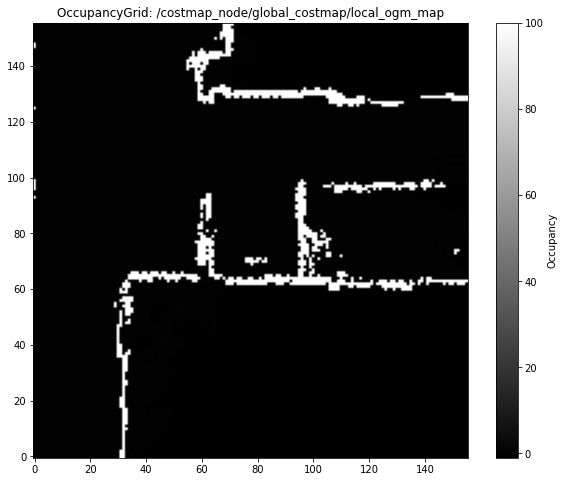


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696198, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=732080811, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interf...
    (truncated, full length: 885 characters)

[Message 2] Timestamp: 2025-11-05 04:53:09 (1762347189965921395)
  Width: 156, Height: 156
  Resolution: 0.05000000074505806
  Origin: x=-53.450, y=-45.800

  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696199, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=962947812, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interf...
    (truncated, full length: 885 characters)

[Message 3] Timestamp: 2025-11-05 04:53:10 (1762347190152231

In [8]:
explore_topic_detailed(reader, '/costmap_node/global_costmap/local_ogm_map', 'nav_msgs/msg/OccupancyGrid', max_messages=5)

In [9]:
# Group topics by message type and functional categories
from collections import defaultdict

def group_topics_by_type(unique_topics):
    """Group topics by their ROS message type"""
    grouped = defaultdict(list)
    for topic, msgtype in unique_topics.items():
        # Extract base message type (e.g., 'nav_msgs/msg/OccupancyGrid' -> 'OccupancyGrid')
        base_type = msgtype.split('/')[-1] if '/' in msgtype else msgtype
        grouped[base_type].append((topic, msgtype))
    return grouped

def group_topics_by_function(unique_topics):
    """Group topics by functional categories for cleaning robots"""
    categories = {
        'Maps': [],
        'Localization & Pose': [],
        'Odometry': [],
        'Control & Commands': [],
        'Device & Sensors': [],
        'Scrubber & Cleaning': [],
        'Protection & Safety': [],
        'Navigation & Path': [],
        'Perception & Objects': [],
        'Diagnostic & Status': [],
        'Workstation': [],
        'Transform (TF)': [],
        'System & Logging': [],
        'Other': []
    }

    for topic, msgtype in unique_topics.items():
        topic_lower = topic.lower()
        msgtype_lower = msgtype.lower()

        # Maps group - all OccupancyGrid and map-related topics
        if 'occupancygrid' in msgtype_lower or 'map' in topic_lower or 'costmap' in topic_lower:
            categories['Maps'].append((topic, msgtype))
        # Localization & Pose
        elif 'pose' in topic_lower or 'localization' in topic_lower:
            categories['Localization & Pose'].append((topic, msgtype))
        # Odometry
        elif 'odom' in topic_lower or 'odometry' in msgtype_lower:
            categories['Odometry'].append((topic, msgtype))
        # Control & Commands
        elif 'cmd' in topic_lower or 'twist' in msgtype_lower or 'control' in topic_lower:
            categories['Control & Commands'].append((topic, msgtype))
        # Scrubber & Cleaning
        elif 'scrubber' in topic_lower or 'brush' in topic_lower or 'clean' in topic_lower:
            categories['Scrubber & Cleaning'].append((topic, msgtype))
        # Protection & Safety
        elif 'protector' in topic_lower or 'protection' in topic_lower or 'safety' in topic_lower or 'elastic_wall' in topic_lower:
            categories['Protection & Safety'].append((topic, msgtype))
        # Device & Sensors
        elif 'device' in topic_lower or 'imu' in topic_lower or 'sensor' in topic_lower:
            categories['Device & Sensors'].append((topic, msgtype))
        # Navigation & Path
        elif 'path' in topic_lower or 'follow' in topic_lower or 'traj' in topic_lower:
            categories['Navigation & Path'].append((topic, msgtype))
        # Perception & Objects
        elif 'object' in topic_lower or 'bounding' in topic_lower or 'detection' in topic_lower or 'depthcam' in topic_lower:
            categories['Perception & Objects'].append((topic, msgtype))
        # Diagnostic & Status
        elif 'diagnostic' in msgtype_lower or 'status' in topic_lower or 'health' in topic_lower:
            categories['Diagnostic & Status'].append((topic, msgtype))
        # Workstation
        elif 'workstation' in topic_lower or 'work_station' in topic_lower:
            categories['Workstation'].append((topic, msgtype))
        # Transform (TF)
        elif 'tf' in msgtype_lower or topic == '/tf':
            categories['Transform (TF)'].append((topic, msgtype))
        # System & Logging
        elif 'rosout' in topic_lower or 'log' in msgtype_lower or 'console' in topic_lower:
            categories['System & Logging'].append((topic, msgtype))
        else:
            categories['Other'].append((topic, msgtype))

    # Remove empty categories
    return {k: v for k, v in categories.items() if v}

# Group topics
topics_by_type = group_topics_by_type(unique_topics)
topics_by_function = group_topics_by_function(unique_topics)

# Print grouping by message type
print("="*80)
print("GROUPING BY MESSAGE TYPE")
print("="*80)
for msgtype, topics in sorted(topics_by_type.items()):
    print(f"\n{msgtype} ({len(topics)} topics):")
    for topic, full_msgtype in sorted(topics):
        print(f"  - {topic}")

# Print grouping by functional category
print("\n" + "="*80)
print("GROUPING BY FUNCTIONAL CATEGORY (Cleaning Robot)")
print("="*80)
for category, topics in sorted(topics_by_function.items()):
    print(f"\n{category} ({len(topics)} topics):")
    for topic, msgtype in sorted(topics):
        print(f"  - {topic} ({msgtype.split('/')[-1]})")


GROUPING BY MESSAGE TYPE

Bool (3 topics):
  - /costmap_node/b_near_danger_area
  - /costmap_node/b_near_drop_ignore_area
  - /device_controller/velocity_brush_down

BoundingBoxes (1 topics):
  - /ssd_ros/bounding_boxes

DiagnosticStatus (16 topics):
  - /device/all_device_status
  - /device/detailed_device_status
  - /device/detailed_scrubber_status
  - /device/device_status
  - /device/health_status
  - /device/imu_data
  - /device/odom_data
  - /device/odom_status
  - /device/operational_device_status
  - /device/scrubber/health_status
  - /device/scrubber_motor_limit
  - /device/scrubber_status
  - /device_controller/operate_scrubber
  - /device_controller/operate_scrubber_manual_mode
  - /op_status
  - /speed_advisor

GeneralObjects (1 topics):
  - /perc/general_objects_static

Int8 (1 topics):
  - /localization/initialize_status

KeyValue (3 topics):
  - /checker/node_beats
  - /device/protector
  - /protector_analog_data

KeyValueArray (2 topics):
  - /gs_work_station/workstatio

In [10]:
# Explore topics by functional category
def explore_category(reader, category_name, topics_by_function, max_messages_per_topic=2):
    """Explore all topics in a specific functional category"""
    if category_name not in topics_by_function:
        print(f"Category '{category_name}' not found!")
        print(f"Available categories: {', '.join(topics_by_function.keys())}")
        return

    topics = topics_by_function[category_name]
    print(f"\n{'='*80}")
    print(f"Exploring category: {category_name} ({len(topics)} topics)")
    print(f"{'='*80}\n")

    for topic, msgtype in sorted(topics):
        explore_topic_detailed(reader, topic, msgtype, max_messages=max_messages_per_topic)
        print("\n" + "-"*80 + "\n")

# Explore topics by message type
def explore_by_message_type(reader, msgtype_name, topics_by_type, max_messages_per_topic=2):
    """Explore all topics of a specific message type"""
    if msgtype_name not in topics_by_type:
        print(f"Message type '{msgtype_name}' not found!")
        print(f"Available message types: {', '.join(sorted(topics_by_type.keys()))}")
        return

    topics = topics_by_type[msgtype_name]
    print(f"\n{'='*80}")
    print(f"Exploring message type: {msgtype_name} ({len(topics)} topics)")
    print(f"{'='*80}\n")

    for topic, full_msgtype in sorted(topics):
        explore_topic_detailed(reader, topic, full_msgtype, max_messages=max_messages_per_topic)
        print("\n" + "-"*80 + "\n")


In [11]:
print("Example: Exploring all Control & Commands topics...")
explore_category(reader, 'Control & Commands', topics_by_function, max_messages_per_topic=2)

Example: Exploring all Control & Commands topics...

Exploring category: Control & Commands (7 topics)


Exploring topic: /chassis_cmd_vel
Message type: geometry_msgs/msg/Twist

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189759766728)
  Linear: x=0.000, y=0.000, z=0.000
  Angular: x=0.000, y=0.000, z=0.000

  === Raw Message Representation ===
    geometry_msgs__msg__Twist(linear=geometry_msgs__msg__Vector3(x=0.0, y=0.0, z=0.0, __msgtype__='geometry_msgs/msg/Vector3'), angular=geometry_msgs__msg__Vector3(x=0.0, y=0.0, z=0.0, __msgtype__='geometry_msgs/msg/Vector3'), __msgtype__='geometry_msgs/msg/Twist')

[Message 2] Timestamp: 2025-11-05 04:53:09 (1762347189779983020)
  Linear: x=0.000, y=0.000, z=0.000
  Angular: x=0.000, y=0.000, z=0.000

  === Raw Message Representation ===
    geometry_msgs__msg__Twist(linear=geometry_msgs__msg__Vector3(x=0.0, y=0.0, z=0.0, __msgtype__='geometry_msgs/msg/Vector3'), angular=geometry_msgs__msg__Vector3(x=0.0, y=0.0, z=0.0, __msgtype__='geome

In [12]:
print("Example: Exploring all Device & Sensors topics...")
explore_category(reader, 'Device & Sensors', topics_by_function, max_messages_per_topic=1)

Example: Exploring all Device & Sensors topics...

Exploring category: Device & Sensors (10 topics)


Exploring topic: /console/device_status
Message type: std_msgs/msg/String

[Message 1] Timestamp: 2025-11-05 04:53:10 (1762347190354930645)
  Content: {"KA1RelayStatus":true,"KA2RelayStatus":true,"KA3RelayStatus":true,"abnormalThreshold1s":23.1,"abnormalThreshold3s":49.65,"abnormalThreshold5s":57.75,"acceleratorStatus":false,"activeMistType":0,"activeWorkModeId":"12a87db2-3c8c-47f7-a581-1f1061b5eb44","activeWorkModeLevel":2,"alarmStatus":10,"autoChargingAbnormal":false,"autoMode":true,"autoSpeedLevel":1,"battery":100,"batteryAlarm":10,"batteryCellNumber":8,"batteryCellTemperature0":26,"batteryCellTemperature1":25,"batteryCellTemperature2":28,"batteryCellTemperature3":26,"batteryCellTemperature4":26,"batteryCellUndervoltage":false,"batteryChargeMosStatus":1,"batteryCurrent":0.0,"batterySoh":100,"batteryVoltage":29010,"batteryVolume":60000,"blanceState":0,"bmsStatus":3,"brakerDown":false

In [13]:
# Explore all topics in the Diagnostic & Status category
explore_category(reader, 'Diagnostic & Status', topics_by_function, max_messages_per_topic=1)


Exploring category: Diagnostic & Status (6 topics)


Exploring topic: /checker/node_beats
Message type: diagnostic_msgs/msg/KeyValue

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189760752853)
  Key: 13057, Value: 

  === Raw Message Representation ===
    diagnostic_msgs__msg__KeyValue(key='13057', value='\x01', __msgtype__='diagnostic_msgs/msg/KeyValue')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /console/status
Message type: std_msgs/msg/String

[Message 1] Timestamp: 2025-11-05 04:53:10 (1762347190550921603)
  Content: {"statusCode":2900,"statusData":{"warningGuideStatus":0},"statusMsg":""}

  === Raw Message Representation ===
    std_msgs__msg__String(data='{"statusCode":2900,"statusData":{"warningGuideStatus":0},"statusMsg":""}', __msgtype__='std_msgs/msg/String')

  Total messages explored: 1

--------------------------------------------------------------------------------


Explorin

In [14]:
# Explore all topics in the Localization & Pose category
explore_category(reader, 'Localization & Pose', topics_by_function, max_messages_per_topic=1)


Exploring category: Localization & Pose (7 topics)


Exploring topic: /localization/current_pose
Message type: geometry_msgs/msg/PoseWithCovarianceStamped

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189775866395)
  Position: x=-49.541, y=-41.918, z=0.000
  Orientation: x=0.000, y=0.000, z=0.711, w=0.704

  === Raw Message Representation ===
    geometry_msgs__msg__PoseWithCovarianceStamped(header=std_msgs__msg__Header(seq=6783379, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=767369600, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), pose=geometry_msgs__msg__PoseWithCovariance(pose=geometry_msgs__msg__Pose(position=geometry_msgs__msg__Point(x=-49.5410164133977, y=-41.918080280311926, z=0.0, __msgtype__='geometry_msgs/msg/Point'), orientation=geometry_msgs__msg__Quaternion(...
    (truncated, full length: 1441 characters)

  Total messages explored: 1

---------------------------------------------------------------


Exploring category: Maps (13 topics)


Exploring topic: /costmap/elastic_virtual_wall/his_traj
Message type: nav_msgs/msg/Path

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189779116145)
  Number of poses: 66
  First pose: x=-50.196, y=-40.587
  Last pose: x=-49.539, y=-41.922

  === Raw Message Representation ===
    nav_msgs__msg__Path(header=std_msgs__msg__Header(seq=3391848, stamp=builtin_interfaces__msg__Time(sec=0, nanosec=0, __msgtype__='builtin_interfaces/msg/Time'), frame_id='/world', __msgtype__='std_msgs/msg/Header'), poses=[geometry_msgs__msg__PoseStamped(header=std_msgs__msg__Header(seq=0, stamp=buil...
    (truncated, full length: 38031 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/b_near_danger_area
Message type: std_msgs/msg/Bool

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189935242395)
  Value: True

  === Raw Message Representation ===
    std_

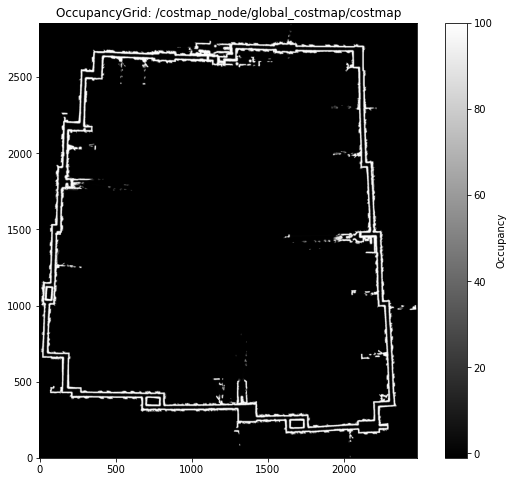


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1730, stamp=builtin_interfaces__msg__Time(sec=1762347238, nanosec=661320793, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interface...
    (truncated, full length: 857 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/costmap_updates
Message type: map_msgs/msg/OccupancyGridUpdate

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189965353812)
  Update region: x=104, y=1689, width=190, height=190
  Data size: 36100


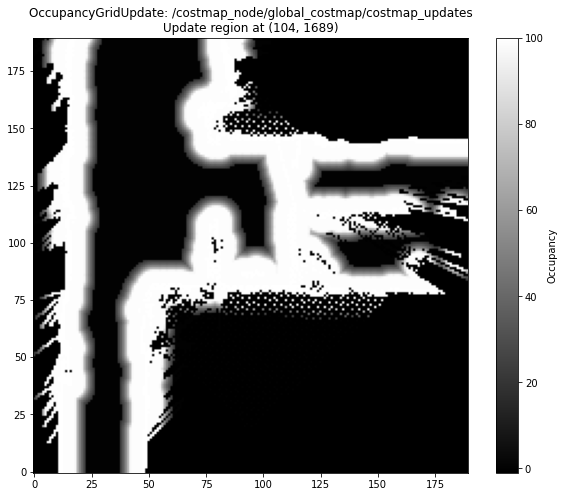


  === Raw Message Representation ===
    map_msgs__msg__OccupancyGridUpdate(header=std_msgs__msg__Header(seq=847525, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=961153478, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), x=104, y=1689, width=190, height=190, data=array([-1, -1, -1, ..., -1, -1, -1], dtype=int8), __msgtype__='map_msgs/msg/OccupancyGridUpdate')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/local_costmap
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189965929520)
  Width: 110, Height: 110
  Resolution: 0.05000000074505806
  Origin: x=87.900, y=-51.400


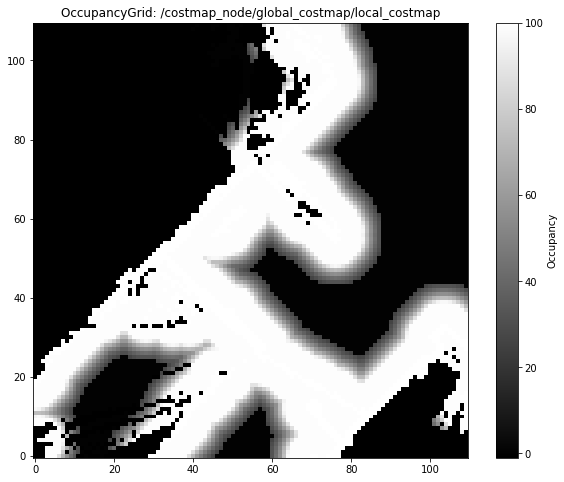


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696199, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=963588020, __msgtype__='builtin_interfaces/msg/Time'), frame_id='base_odom', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_in...
    (truncated, full length: 887 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/local_ogm_map
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189756751478)
  Width: 156, Height: 156
  Resolution: 0.05000000074505806
  Origin: x=-53.450, y=-45.800


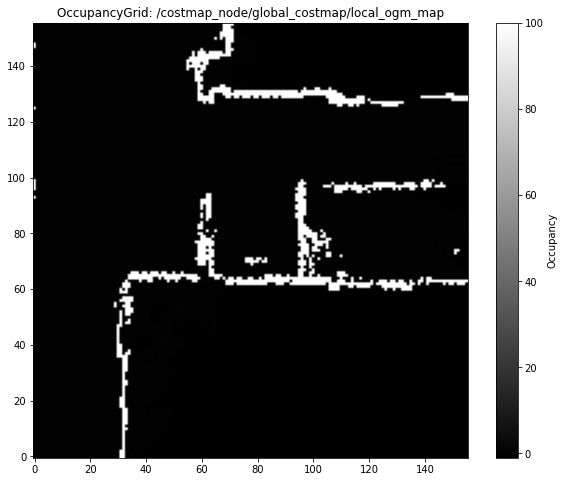


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696198, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=732080811, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interf...
    (truncated, full length: 885 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/local_virtual_wall_map
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189935589812)
  Width: 110, Height: 110
  Resolution: 0.05000000074505806
  Origin: x=87.900, y=-51.400


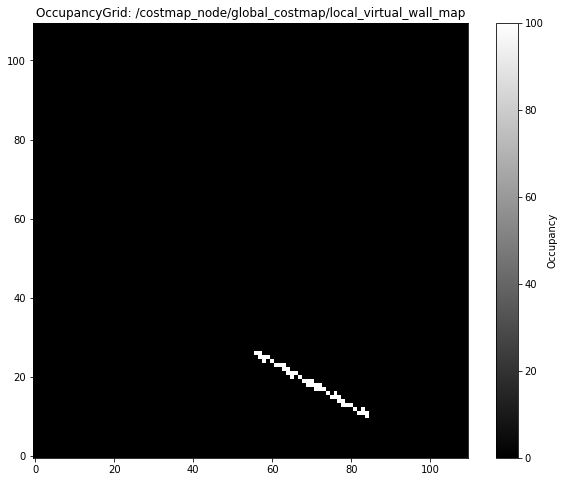


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696199, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=933387978, __msgtype__='builtin_interfaces/msg/Time'), frame_id='base_odom', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_in...
    (truncated, full length: 881 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/realtime_staitc_inflation_map
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:55:38 (1762347338896035549)
  Width: 2481, Height: 2857
  Resolution: 0.05000000074505806
  Origin: x=-59.500, y=-131.100


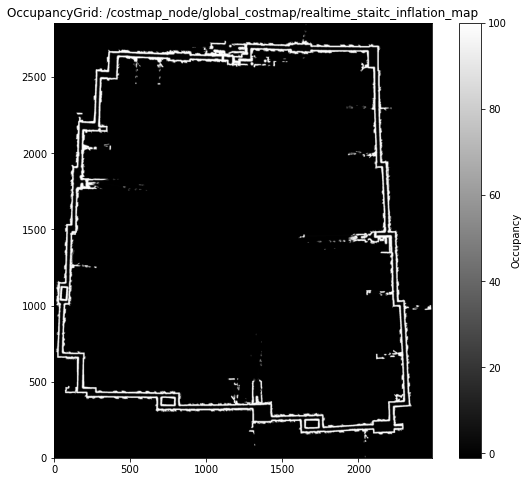


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1697, stamp=builtin_interfaces__msg__Time(sec=1762347338, nanosec=660919841, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interface...
    (truncated, full length: 857 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/realtime_staitc_inflation_map_updates
Message type: map_msgs/msg/OccupancyGridUpdate

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189965611937)
  Update region: x=104, y=1689, width=190, height=190
  Data size: 36100


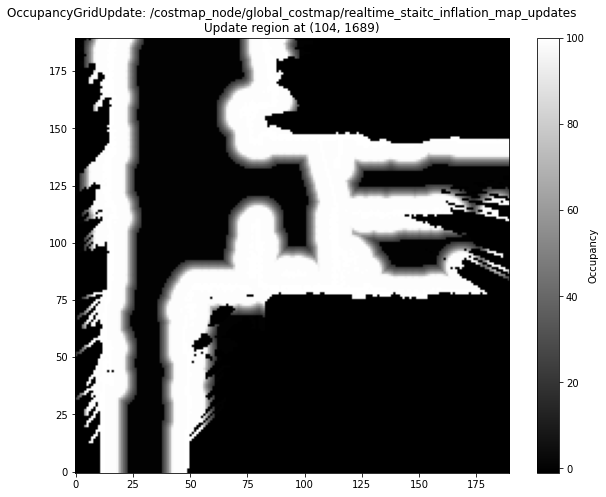


  === Raw Message Representation ===
    map_msgs__msg__OccupancyGridUpdate(header=std_msgs__msg__Header(seq=847525, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=961545770, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), x=104, y=1689, width=190, height=190, data=array([-1, -1, -1, ..., -1, -1, -1], dtype=int8), __msgtype__='map_msgs/msg/OccupancyGridUpdate')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /costmap_node/global_costmap/record_type_map
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189965822478)
  Width: 110, Height: 110
  Resolution: 0.05000000074505806
  Origin: x=87.900, y=-51.400


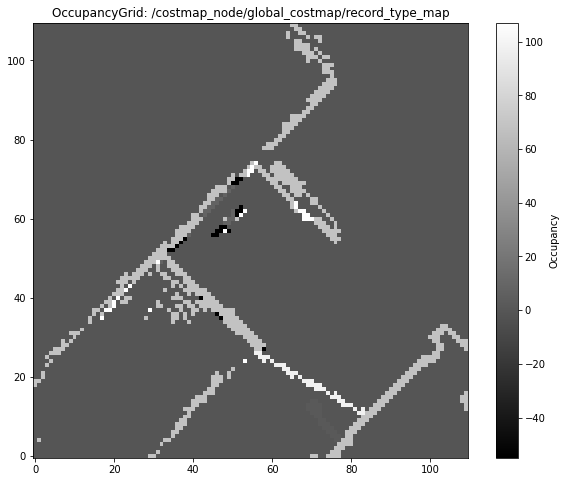


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696199, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=963383270, __msgtype__='builtin_interfaces/msg/Time'), frame_id='base_odom', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_in...
    (truncated, full length: 887 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /local_grid_aaa
Message type: nav_msgs/msg/OccupancyGrid

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189757199478)
  Width: 110, Height: 110
  Resolution: 0.05000000074505806
  Origin: x=-52.280, y=-44.691


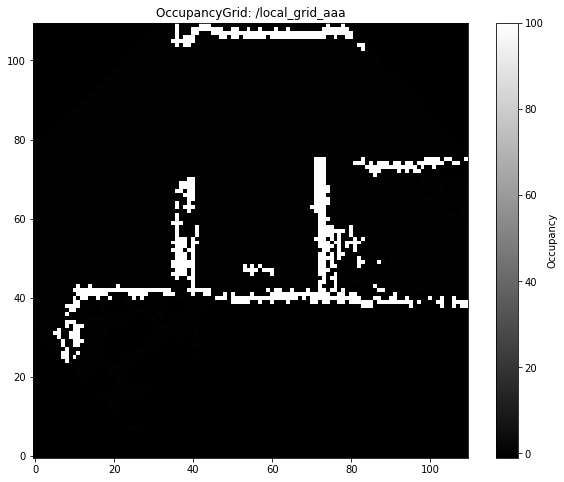


  === Raw Message Representation ===
    nav_msgs__msg__OccupancyGrid(header=std_msgs__msg__Header(seq=1696187, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=730471436, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), info=nav_msgs__msg__MapMetaData(map_load_time=builtin_interf...
    (truncated, full length: 884 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------



In [15]:
# Explore all topics in the Maps category
explore_category(reader, 'Maps', topics_by_function, max_messages_per_topic=1)

In [16]:
# Explore all topics in the Navigation & Path category
explore_category(reader, 'Navigation & Path', topics_by_function, max_messages_per_topic=1)


Exploring category: Navigation & Path (2 topics)


Exploring topic: /eco_decision/path_follow_state
Message type: eco_sys/msg/PathFollowState

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189870494770)
  Available attributes: excute_state, follow_idx, id, info, thread_state
    excute_state: 0
    follow_idx: 0
    id: 0
    info: [eco_sys__msg__KeyInt32s(key='N3eco3pnc16DecisionCmdStateE', values=array([0], dtype=int32), __msgtype__='eco_sys/msg/KeyInt32s')]
    thread_state: 0

  === Raw Message Representation ===
    eco_sys__msg__PathFollowState(id=0, follow_idx=0, excute_state=0, thread_state=0, info=[eco_sys__msg__KeyInt32s(key='N3eco3pnc16DecisionCmdStateE', values=array([0], dtype=int32), __msgtype__='eco_sys/msg/KeyInt32s')], __msgtype__='eco_sys/msg/PathFollowState')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /eco_planning/path_follow_state
Message type: eco_sys/msg/PathFollowState


In [17]:
# Explore all topics in the Odometry category
explore_category(reader, 'Odometry', topics_by_function, max_messages_per_topic=1)


Exploring category: Odometry (3 topics)


Exploring topic: /device/odom_data
Message type: diagnostic_msgs/msg/DiagnosticStatus

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189759655561)
  Level: 0 (OK)
  Name: OdometryData
  Message: OdometryData

  Key-Value pairs (6 total):
    1. counts_left: -2049057288
    2. counts_right: -1977699736
    3. delta_counts_left: 0
    4. delta_counts_right: 0
    5. stamp_sec: 1762347189
    6. stamp_nsec: 727402520
  Hardware ID: OdometryData

  === Deep Message Inspection ===

  Message __dict__ keys: ['level', 'name', 'message', 'hardware_id', 'values', 'OK', 'WARN', 'ERROR', 'STALE', '__msgtype__']
    level: 0
    name: OdometryData
    message: OdometryData
    hardware_id: OdometryData
    values: 6 items
      [0] counts_left: -2049057288
      [1] counts_right: -1977699736
      [2] delta_counts_left: 0
      [3] delta_counts_right: 0
      [4] stamp_sec: 1762347189
      ... and 1 more
    OK: 0
    WARN: 1
    ERROR: 2
    STALE:

In [18]:
# Explore all topics in the Perception & Objects category
explore_category(reader, 'Perception & Objects', topics_by_function, max_messages_per_topic=1)


Exploring category: Perception & Objects (7 topics)


Exploring topic: /depthcam_fusion_objects
Message type: common_services/msg/ObjectLists

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189792283478)
  Number of objects: 8

  === Raw Message Representation ===
    common_services__msg__ObjectLists(header=std_msgs__msg__Header(seq=3386612, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=791208978, __msgtype__='builtin_interfaces/msg/Time'), frame_id='follow_link', __msgtype__='std_msgs/msg/Header'), objects=[common_services__msg__Object(type=-1, id=0, tracking_time=0.0, is_dynamic=False, center_point=geometry_msgs__msg__Vector3(x=0.0, y=0.0, z=0.0, __msgtype__='geometry_msgs/msg/Vector3'), convex_hull=[geometry_msgs__msg__Vector3(x=29.614318847...
    (truncated, full length: 15823 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /perc/Objects/Debug/Visual
Message type: vis

In [19]:
# Explore all topics in the Protection & Safety category
explore_category(reader, 'Protection & Safety', topics_by_function, max_messages_per_topic=1)


Exploring category: Protection & Safety (5 topics)


Exploring topic: /device/protector
Message type: diagnostic_msgs/msg/KeyValue

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189757873520)
  Key: protector_data, Value: 1111

  === Raw Message Representation ===
    diagnostic_msgs__msg__KeyValue(key='protector_data', value='1111', __msgtype__='diagnostic_msgs/msg/KeyValue')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /elastic_wall_flag
Message type: std_msgs/msg/UInt8

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189757487645)
  Value: 1

  === Raw Message Representation ===
    std_msgs__msg__UInt8(data=1, __msgtype__='std_msgs/msg/UInt8')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /protector
Message type: std_msgs/msg/String

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189757237103)
  Conte

In [20]:
# Explore all topics in the Scrubber & Cleaning category
explore_category(reader, 'Scrubber & Cleaning', topics_by_function, max_messages_per_topic=1)


Exploring category: Scrubber & Cleaning (4 topics)


Exploring topic: /device/detailed_scrubber_status
Message type: diagnostic_msgs/msg/DiagnosticStatus

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189760235145)
  Level: 0 (OK)
  Name: DetailedScrubberStatus
  Message: DetailedScrubberStatus
  Values: (empty or None)
    Values type: <class 'list'>, length: 0
  Hardware ID: DetailedScrubberStatus

  === Deep Message Inspection ===

  Message __dict__ keys: ['level', 'name', 'message', 'hardware_id', 'values', 'OK', 'WARN', 'ERROR', 'STALE', '__msgtype__']
    level: 0
    name: DetailedScrubberStatus
    message: DetailedScrubberStatus
    hardware_id: DetailedScrubberStatus
    values: []
    OK: 0
    WARN: 1
    ERROR: 2
    STALE: 3

  Additional attributes found: ERROR, OK, STALE, WARN
    ERROR: 2
    OK: 0
    STALE: 3
    WARN: 1

  === Raw Message Representation ===
    diagnostic_msgs__msg__DiagnosticStatus(level=0, name='DetailedScrubberStatus', message='DetailedScr

In [21]:
# Explore all topics in the System & Logging category
explore_category(reader, 'System & Logging', topics_by_function, max_messages_per_topic=1)


Exploring category: System & Logging (1 topics)


Exploring topic: /rosout
Message type: rosgraph_msgs/msg/Log

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189765252978)
  Level: 2 (INFO)
  Logger/Node: /chassis
  Message: [CHASSIS] IMU orientation(1808 1798 1340) angular_velocity(0 0 1) linear_acceleration(4 15 1015) magnetic(0 0 0)
  File: imu.cc
  Function: GetData
  Line: 286
  Log Timestamp: 2025-11-05 04:53:09.764 (1762347189.764560270)
  Related topics: []
  Level constants: DEBUG=1, INFO=2, WARN=4, ERROR=8, FATAL=16

  === Raw Message Representation ===
    rosgraph_msgs__msg__Log(header=std_msgs__msg__Header(seq=25983644, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=764560270, __msgtype__='builtin_interfaces/msg/Time'), frame_id='', __msgtype__='std_msgs/msg/Header'), level=2, name='/chassis', msg='[CHASSIS] IMU orientation(1808 1798 1340) angular_velocity(0 0 1) linear_acceleration(4 15 1015) magnetic(0 0 0)', file='imu.cc', function='GetData', line=286

In [22]:
# Explore all topics in the Transform (TF) category
explore_category(reader, 'Transform (TF)', topics_by_function, max_messages_per_topic=1)


Exploring category: Transform (TF) (1 topics)


Exploring topic: /tf
Message type: tf2_msgs/msg/TFMessage

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189774544020)
  Number of transforms: 1
    Transform 1: base_odom -> base_link

  === Raw Message Representation ===
    tf2_msgs__msg__TFMessage(transforms=[geometry_msgs__msg__TransformStamped(header=std_msgs__msg__Header(seq=0, stamp=builtin_interfaces__msg__Time(sec=1762347189, nanosec=766415270, __msgtype__='builtin_interfaces/msg/Time'), frame_id='base_odom', __msgtype__='std_msgs/msg/Header'), child_frame_id='base_link', transform=geometry_msgs__msg__Transform(translation=geometry_msgs__msg__Vector3(x=90.67359804076723, y=-48.6578635374994, z=0.0, __msgtype__='geometry_msgs/msg/Vector3'), rotation=geometry_...
    (truncated, full length: 759 characters)

  Total messages explored: 1

--------------------------------------------------------------------------------



In [23]:
# Explore all topics in the Other category
explore_category(reader, 'Other', topics_by_function, max_messages_per_topic=1)


Exploring category: Other (5 topics)


Exploring topic: /deceleration_flag
Message type: std_msgs/msg/UInt8

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189922455145)
  Value: 0

  === Raw Message Representation ===
    std_msgs__msg__UInt8(data=0, __msgtype__='std_msgs/msg/UInt8')

  Total messages explored: 1

--------------------------------------------------------------------------------


Exploring topic: /project_node/freespace_pts_proj_tracking/vis/tracking_fov_polygon
Message type: visualization_msgs/msg/Marker

[Message 1] Timestamp: 2025-11-05 04:53:09 (1762347189865487728)
  Full message:
    visualization_msgs__msg__Marker(header=std_msgs__msg__Header(seq=1693261, stamp=builtin_interfaces__msg__Time(sec=0, nanosec=0, __msgtype__='builtin_interfaces/msg/Time'), frame_id='world', __msgtype__='std_msgs/msg/Header'), ns='polygon', id=0, type=4, action=0, pose=geometry_msgs__msg__Pose(position=geometry_msgs__msg__Point(x=0.0, y=0.0, z=0.0, __msgtype__='geometry_msgs/msg/

In [24]:
# Explore other categories - uncomment and modify as needed
# Available categories:
print("Available functional categories:")
for cat in sorted(topics_by_function.keys()):
    print(f"  - {cat} ({len(topics_by_function[cat])} topics)")

print("\nAvailable message types:")
for msgtype in sorted(topics_by_type.keys()):
    print(f"  - {msgtype} ({len(topics_by_type[msgtype])} topics)")

# Examples (uncomment to use):
# explore_category(reader, 'Maps', topics_by_function, max_messages_per_topic=2)
# explore_category(reader, 'Device & Sensors', topics_by_function, max_messages_per_topic=2)
# explore_category(reader, 'Scrubber & Cleaning', topics_by_function, max_messages_per_topic=2)
# explore_category(reader, 'Localization & Pose', topics_by_function, max_messages_per_topic=2)
# explore_category(reader, 'Protection & Safety', topics_by_function, max_messages_per_topic=2)

# Or explore by message type:
# explore_by_message_type(reader, 'OccupancyGrid', topics_by_type, max_messages_per_topic=2)
# explore_by_message_type(reader, 'DiagnosticStatus', topics_by_type, max_messages_per_topic=2)


Available functional categories:
  - Control & Commands (7 topics)
  - Device & Sensors (10 topics)
  - Diagnostic & Status (6 topics)
  - Localization & Pose (7 topics)
  - Maps (13 topics)
  - Navigation & Path (2 topics)
  - Odometry (3 topics)
  - Other (5 topics)
  - Perception & Objects (7 topics)
  - Protection & Safety (5 topics)
  - Scrubber & Cleaning (4 topics)
  - System & Logging (1 topics)
  - Transform (TF) (1 topics)

Available message types:
  - Bool (3 topics)
  - BoundingBoxes (1 topics)
  - DiagnosticStatus (16 topics)
  - GeneralObjects (1 topics)
  - Int8 (1 topics)
  - KeyValue (3 topics)
  - KeyValueArray (2 topics)
  - Log (1 topics)
  - Marker (1 topics)
  - MarkerArray (4 topics)
  - ObjectLists (1 topics)
  - OccupancyGrid (7 topics)
  - OccupancyGridUpdate (2 topics)
  - Odometry (1 topics)
  - Path (1 topics)
  - PathFollowState (3 topics)
  - PolygonStamped (1 topics)
  - PoseWithCovarianceStamped (3 topics)
  - SpeedLimit (1 topics)
  - String (7 topics)

### Convert to dataframes

In [25]:
# ============================================================================
# REVISED DATA EXTRACTION: Process ALL fields from FIRST message only
# ============================================================================
# This version:
# 1. Extracts only the FIRST message from each topic (single timestamp)
# 2. Expands ALL array elements (no summaries for large arrays)
# 3. Parses ALL fields completely (e.g., all 86 Key-Value pairs in DiagnosticStatus)

def flatten_ros_message_complete(msg, prefix='', max_depth=20, current_depth=0):
    """
    Recursively flatten a ROS message into a dictionary, expanding ALL fields.
    This version expands ALL array elements, not just summaries.
    """
    if current_depth >= max_depth:
        return {prefix: str(msg) if prefix else 'max_depth_reached'}

    result = {}

    # Handle common ROS message types
    if hasattr(msg, '__dict__'):
        for key, value in msg.__dict__.items():
            if key == '__msgtype__':
                continue

            new_key = f"{prefix}.{key}" if prefix else key

            # Handle nested messages
            if hasattr(value, '__dict__') and hasattr(value, '__msgtype__'):
                nested = flatten_ros_message_complete(value, new_key, max_depth, current_depth + 1)
                result.update(nested)
            # Handle lists/arrays - EXPAND ALL ELEMENTS
            elif isinstance(value, (list, tuple, np.ndarray)):
                if len(value) == 0:
                    result[new_key] = []
                    result[f"{new_key}_length"] = 0
                else:
                    # Expand ALL elements in the array
                    result[f"{new_key}_length"] = len(value)
                    for i, item in enumerate(value):
                        item_key = f"{new_key}[{i}]"
                        if hasattr(item, '__dict__') and hasattr(item, '__msgtype__'):
                            # For nested ROS messages, flatten recursively
                            nested = flatten_ros_message_complete(item, item_key, max_depth, current_depth + 1)
                            result.update(nested)
                        elif isinstance(item, dict):
                            # For dictionaries, flatten them
                            for k, v in item.items():
                                dict_item_key = f"{item_key}.{k}"
                                result[dict_item_key] = v
                        else:
                            # For primitive types, store directly
                            if isinstance(item, (np.integer, np.floating)):
                                result[item_key] = item.item()
                            elif isinstance(item, np.ndarray):
                                if item.size == 1:
                                    result[item_key] = item.item()
                                else:
                                    result[item_key] = item.tolist()
                            else:
                                result[item_key] = item
            # Handle dictionaries
            elif isinstance(value, dict):
                for k, v in value.items():
                    dict_key = f"{new_key}.{k}"
                    if hasattr(v, '__dict__') and hasattr(v, '__msgtype__'):
                        nested = flatten_ros_message_complete(v, dict_key, max_depth, current_depth + 1)
                        result.update(nested)
                    else:
                        result[dict_key] = v
            # Handle primitive types
            else:
                # Convert numpy types to Python types
                if isinstance(value, (np.integer, np.floating)):
                    result[new_key] = value.item()
                elif isinstance(value, np.ndarray):
                    if value.size == 1:
                        result[new_key] = value.item()
                    else:
                        result[new_key] = value.tolist()
                else:
                    result[new_key] = value
    else:
        # Fallback for non-dict objects
        result[prefix if prefix else 'value'] = str(msg)

    return result

def parse_diagnostic_status_values(msg):
    """
    Special handler for DiagnosticStatus messages to extract all Key-Value pairs.
    Returns a dictionary with all key-value pairs as separate fields.
    """
    result = {}

    if hasattr(msg, 'values') and msg.values:
        # Expand all KeyValue pairs
        for i, kv in enumerate(msg.values):
            if hasattr(kv, 'key') and hasattr(kv, 'value'):
                key = kv.key
                value = kv.value

                # Try to convert value to appropriate type
                try:
                    # Try integer
                    if value.isdigit() or (value.startswith('-') and value[1:].isdigit()):
                        value = int(value)
                    # Try float
                    elif '.' in value or 'e' in value.lower():
                        value = float(value)
                    # Try boolean
                    elif value.lower() in ['true', 'false']:
                        value = value.lower() == 'true'
                except:
                    pass  # Keep as string if conversion fails

                # Use key as field name, sanitize if needed
                field_name = key.replace(' ', '_').replace('.', '_').replace('-', '_')
                result[f"values.{field_name}"] = value
                # Also keep index for reference
                result[f"values[{i}].key"] = key
                result[f"values[{i}].value"] = value

    return result

def parse_key_value_array_values(msg):
    """
    Special handler for KeyValueArray messages to extract all Key-Value pairs.
    """
    result = {}

    if hasattr(msg, 'values') and msg.values:
        for i, kv in enumerate(msg.values):
            if hasattr(kv, 'key') and hasattr(kv, 'value'):
                key = kv.key
                value = kv.value

                # Try to convert value to appropriate type
                try:
                    if value.isdigit() or (value.startswith('-') and value[1:].isdigit()):
                        value = int(value)
                    elif '.' in value or 'e' in value.lower():
                        value = float(value)
                    elif value.lower() in ['true', 'false']:
                        value = value.lower() == 'true'
                except:
                    pass

                field_name = key.replace(' ', '_').replace('.', '_').replace('-', '_')
                result[f"data.{field_name}"] = value
                result[f"data[{i}].key"] = key
                result[f"data[{i}].value"] = value

    return result

def extract_first_message_complete(reader, topic_name, msgtype):
    """
    Extract only the FIRST message from a topic and parse ALL fields completely.
    Returns a single flattened dictionary with all fields expanded.
    """
    for conn, ts, raw in reader.messages():
        if conn.topic == topic_name:
            try:
                msg = reader.deserialize(raw, conn.msgtype)
                ts_seconds = ts / 1e9
                timestamp = datetime.fromtimestamp(ts_seconds)

                # Start with base flattening
                flattened = flatten_ros_message_complete(msg)

                # Add timestamp
                flattened['Timestamp'] = timestamp
                flattened['Timestamp_ns'] = ts
                flattened['Topic'] = topic_name
                flattened['MessageType'] = msgtype

                # Special handling for DiagnosticStatus - expand all values
                if 'DiagnosticStatus' in msgtype:
                    values_dict = parse_diagnostic_status_values(msg)
                    flattened.update(values_dict)

                # Special handling for KeyValueArray - expand all values
                if 'KeyValueArray' in msgtype:
                    values_dict = parse_key_value_array_values(msg)
                    flattened.update(values_dict)

                # For String messages, try to parse JSON if it looks like JSON
                if 'data' in flattened and isinstance(flattened['data'], str):
                    try:
                        parsed = json.loads(flattened['data'])
                        if isinstance(parsed, dict):
                            # Flatten the JSON and add to the result
                            json_flattened = flatten_dict(parsed)
                            # Prefix JSON fields to avoid conflicts
                            for k, v in json_flattened.items():
                                flattened[f'json_{k}'] = v
                    except (json.JSONDecodeError, TypeError):
                        pass

                return flattened
            except Exception as e:
                print(f"  Warning: Error extracting message from {topic_name}: {e}")
                return None

    return None

def topic_first_message_to_dataframe(reader, topic_name, msgtype):
    """
    Extract the FIRST message from a topic and convert it to a single-row DataFrame.
    All fields are fully expanded.
    """
    flattened = extract_first_message_complete(reader, topic_name, msgtype)

    if flattened is None:
        return pd.DataFrame()

    # Convert to DataFrame (single row)
    df = pd.DataFrame([flattened])

    # Ensure Timestamp is datetime
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    return df

def extract_category_first_messages(reader, category_name, topics_by_function):
    """
    Extract FIRST message from all topics in a category.
    Returns a dictionary mapping topic names to single-row DataFrames.
    """
    if category_name not in topics_by_function:
        print(f"Category '{category_name}' not found!")
        return {}

    category_dataframes = {}
    topics = topics_by_function[category_name]

    print(f"Extracting FIRST message from {len(topics)} topics in category '{category_name}'...")

    for topic, msgtype in sorted(topics):
        print(f"  Processing {topic}...")
        try:
            df = topic_first_message_to_dataframe(reader, topic, msgtype)
            if not df.empty:
                category_dataframes[topic] = df
                print(f"    ✓ Extracted 1 message, {len(df.columns)} columns")
                # Show some key columns
                cols = list(df.columns)[:10]
                print(f"    Columns: {cols}...")
            else:
                print(f"    ⚠ No messages found")
        except Exception as e:
            print(f"    ✗ Error: {e}")
            import traceback
            traceback.print_exc()

    return category_dataframes

def extract_all_categories_first_messages(reader, topics_by_function):
    """
    Extract FIRST message from all topics in all categories.
    Returns nested dictionary: {category_name: {topic_name: DataFrame}}
    Each DataFrame has only 1 row (the first message).
    """
    all_dataframes = {}

    for category_name in sorted(topics_by_function.keys()):
        print(f"\n{'='*80}")
        print(f"Processing category: {category_name}")
        print(f"{'='*80}")

        category_dataframes = extract_category_first_messages(reader, category_name, topics_by_function)
        if category_dataframes:
            all_dataframes[category_name] = category_dataframes

    return all_dataframes


In [26]:
# Example: Extract first message from Device & Sensors category

print("Extracting FIRST message from Device & Sensors category...")
print("="*80)
diagnostic_first = extract_category_first_messages(reader, 'Device & Sensors', topics_by_function)

# View the extracted DataFrames
print("\n" + "="*80)
print("Extracted DataFrames Summary:")
print("="*80)
for topic, df in diagnostic_first.items():
    print(f"\n{topic}:")
    print(f"  Shape: {df.shape} (rows, columns)")
    print(f"  Total columns: {len(df.columns)}")

    # Show DiagnosticStatus values columns
    if 'DiagnosticStatus' in df['MessageType'].iloc[0]:
        values_cols = [col for col in df.columns if col.startswith('values.') and not '[' in col]
        print(f"  DiagnosticStatus values fields: {len(values_cols)}")
        if values_cols:
            print(f"    Sample: {values_cols[:5]}")

    # Show JSON parsed columns
    json_cols = [col for col in df.columns if col.startswith('json_')]
    if json_cols:
        print(f"  Parsed JSON fields: {len(json_cols)}")
        print(f"    Sample: {json_cols[:5]}")

    # Show all columns
    print(f"\n  All columns:")
    for i, col in enumerate(df.columns, 1):
        val = df[col].iloc[0]
        if pd.notna(val):
            val_str = str(val)
            if len(val_str) > 50:
                val_str = val_str[:50] + "..."
            print(f"    {i}. {col}: {val_str}")


Extracting FIRST message from Device & Sensors category...
Extracting FIRST message from 10 topics in category 'Device & Sensors'...
  Processing /console/device_status...
    ⚠ No messages found
  Processing /device/all_device_status...
    ✓ Extracted 1 message, 271 columns
    Columns: ['level', 'name', 'message', 'hardware_id', 'values_length', 'values[0].key', 'values[0].value', 'values[1].key', 'values[1].value', 'values[2].key']...
  Processing /device/detailed_device_status...
    ✓ Extracted 1 message, 136 columns
    Columns: ['level', 'name', 'message', 'hardware_id', 'values_length', 'values[0].key', 'values[0].value', 'values[1].key', 'values[1].value', 'values[2].key']...
  Processing /device/device_status...
    ✓ Extracted 1 message, 366 columns
    Columns: ['level', 'name', 'message', 'hardware_id', 'values_length', 'values[0].key', 'values[0].value', 'values[1].key', 'values[1].value', 'values[2].key']...
  Processing /device/dio_data...
    ✓ Extracted 1 message, 5 

/var/folders/jf/t9_qfxsd0sx23z06hjfxh7kw0000gn/T/ipykernel_12974/122294112.py:33: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pd.notna(val):


In [27]:
diagnostic_first['/device/all_device_status']

,level,name,message,hardware_id,values_length,values[0].key,values[0].value,values[1].key,values[1].value,values[2].key,...,values.robot_charger_status,values.charger,values.mist_buzzer,values.mist_box_warn_light,values.mist_box_high_level_sensor,values.mist_box_low_level_sensor,values.mist_box_low_low_level_sensor,values.wheel_motor_enable_status,values.brush_position_level,values.side_brush_position_level
0,0,AllDevicesStatus,AllDevicesStatus,AllDevicesStatus,86,mcu_error_code_44,10,di,0,do,...,0,5,0,0,0,1,1,0,0,0


In [28]:
all_first_messages = extract_all_categories_first_messages(reader, topics_by_function)


Processing category: Control & Commands
Extracting FIRST message from 7 topics in category 'Control & Commands'...
  Processing /chassis_cmd_vel...
    ✓ Extracted 1 message, 10 columns
    Columns: ['linear.x', 'linear.y', 'linear.z', 'angular.x', 'angular.y', 'angular.z', 'Timestamp', 'Timestamp_ns', 'Topic', 'MessageType']...
  Processing /device_controller/inspect_cleaning_ability...
    ⚠ No messages found
  Processing /device_controller/operate_scrubber...
    ✓ Extracted 1 message, 73 columns
    Columns: ['level', 'name', 'message', 'hardware_id', 'values_length', 'values[0].key', 'values[0].value', 'values[1].key', 'values[1].value', 'values[2].key']...
  Processing /device_controller/operate_scrubber_manual_mode...
    ✓ Extracted 1 message, 73 columns
    Columns: ['level', 'name', 'message', 'hardware_id', 'values_length', 'values[0].key', 'values[0].value', 'values[1].key', 'values[1].value', 'values[2].key']...
  Processing /device_controller/velocity_brush_down...
    ✓

In [29]:
import os

# Create directory if it doesn't exist
output_dir = "bag_data"
os.makedirs(output_dir, exist_ok=True)

for category, topics_dict in all_first_messages.items():
    for topic, df in topics_dict.items():
        # Make topic name safe for filenames
        safe_topic = topic.replace('/', '_').replace(' ', '_')
        # Full path inside bag_data directory
        filename = os.path.join(output_dir, f"first_message_{category}_{safe_topic}.csv")
        df.to_csv(filename, index=False)
        print(f"Saved: {filename} ({len(df.columns)} columns)")

Saved: bag_data/first_message_Control & Commands__chassis_cmd_vel.csv (10 columns)
Saved: bag_data/first_message_Control & Commands__device_controller_operate_scrubber.csv (73 columns)
Saved: bag_data/first_message_Control & Commands__device_controller_operate_scrubber_manual_mode.csv (73 columns)
Saved: bag_data/first_message_Control & Commands__device_controller_velocity_brush_down.csv (5 columns)
Saved: bag_data/first_message_Control & Commands__eco_control_path_follow_state.csv (12 columns)
Saved: bag_data/first_message_Control & Commands__work_station_controller_status.csv (17 columns)
Saved: bag_data/first_message_Device & Sensors__device_all_device_status.csv (271 columns)
Saved: bag_data/first_message_Device & Sensors__device_detailed_device_status.csv (136 columns)
Saved: bag_data/first_message_Device & Sensors__device_device_status.csv (366 columns)
Saved: bag_data/first_message_Device & Sensors__device_dio_data.csv (5 columns)
Saved: bag_data/first_message_Device & Sensors__

# Fault/Error/Issue/Event Tracking Topics

This section documents topics that are directly relevant to faults, errors, issues, and events in the cleaning robot system. These topics can be used to detect, diagnose, and correlate system anomalies.

## Direct Fault/Error Indicators

### **Diagnostic & Status Topics**

#### `/device/health_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Overall device health status
**Key Fields**:
- `level`: **int** - Diagnostic level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `name`: **string** - Status name (e.g., "HealthStatus", "DeviceHealth")
- `message`: **string** - Status message text
- `hardware_id`: **string** - Hardware identifier
- `values`: **array** - Array of Key-Value pairs containing:
  - Device health metrics (string values, converted to int/float/bool when possible)
  - Error codes (string values representing numeric codes)
  - Warning flags (string "true"/"false" or "0"/"1")
  - Status indicators (various string values)

#### `/device/all_device_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Comprehensive status of all devices
**Key Fields**:
- `level`: **int** - Overall diagnostic level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with 270+ Key-Value pairs including:
  - `values.mcu_error_code_44`: **string/int** - MCU error codes (e.g., "10", "0" - non-zero indicates errors)
  - `values.di`: **string/int** - Digital input status (binary flags or numeric codes)
  - `values.do`: **string/int** - Digital output status (binary flags or numeric codes)
  - `values.relay`: **string/int** - Relay status (relay state values)
  - All device-specific error codes and status flags (string values, converted to int/bool when applicable)

#### `/device/device_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: General device status with detailed metrics
**Key Fields**:
- `level`: **int** - Diagnostic level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with 365+ Key-Value pairs including:
  - Error codes from all subsystems (string values representing numeric codes)
  - Device operational states (string "true"/"false" or numeric flags)
  - Sensor statuses (string status values)
  - Communication status (string connection states)

#### `/device/detailed_device_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Detailed device status breakdown
**Key Fields**:
- `level`: **int** - Diagnostic level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with 135+ Key-Value pairs containing:
  - Detailed error information (string error descriptions/codes)
  - Component-specific status (string status values)
  - Diagnostic details (string diagnostic messages)

#### `/device/operational_device_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Operational status of devices
**Key Fields**:
- `level`: **int** - Operational level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with operational status indicators:
  - Device availability (string "available"/"unavailable" or boolean flags)
  - Operational mode flags (string mode names or numeric mode codes)
  - System readiness (string readiness states)

#### `/op_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Overall operational status
**Key Fields**:
- `level`: **int** - Operational level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Key-Value pairs with:
  - System operational state (string state values)
  - Error conditions (string error codes/descriptions)
  - Status flags (string "true"/"false" or numeric flags)

#### `/console/status`
**Message Type**: `std_msgs/msg/String` (JSON format)
**Purpose**: Console status with error codes
**Key Fields** (parsed JSON):
- `json_statusCode`: **int/float** - Status code (e.g., 2900, 0) - non-zero indicates errors/warnings
- `json_statusData.warningGuideStatus`: **int/float** - Warning guide status (e.g., 0=normal, non-zero=warning)
- `json_statusMsg`: **string** - Status message text (may be empty string "")
- Non-zero status codes indicate errors or warnings

#### `/checker/node_beats`
**Message Type**: `diagnostic_msgs/msg/KeyValue`
**Purpose**: Node heartbeat monitoring - indicates node failures
**Key Fields**:
- `key`: **string** - Node identifier (e.g., "13057", node names)
- `value`: **string** - Heartbeat value ("0" or "1", or "\x01" for alive)
- Missing or zero values indicate node failures or communication issues

### **Scrubber & Cleaning Status Topics**

#### `/device/scrubber_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Comprehensive scrubber status with 86+ Key-Value pairs
**Key Fields** (all in `values` array, parsed as `values.key_name`):
- **Error Indicators**:
  - `values.brush_detection_result`: **int** - Brush detection status (0=normal, non-zero may indicate issues)
  - `values.head_cover_detect_status`: **int** - Cover detection status (0=normal, non-zero=issue detected)
  - `values.batteryAlarm`: **int** - Battery alarm status (10=normal, other values indicate issues)
  - `values.batteryUndervoltage`: **bool** - Battery undervoltage flag (false=normal, true=undervoltage)
  - `values.autoChargingAbnormal`: **bool** - Charging abnormality flag (false=normal, true=abnormal)
  - `values.brakerDown`: **bool** - Brake status (false=normal, true=brake down)
- **Operational Status**:
  - `values.brush_motor`: **bool** - Brush motor state (false=off, true=on)
  - `values.brush_motor_working`: **bool** - Brush motor working state (false=not working, true=working)
  - `values.squeegee_motor`: **bool** - Squeegee motor state (false=off, true=on)
  - `values.side_brush_motor`: **bool** - Side brush motor state (false=off, true=on)
  - `values.cleaning_working`: **bool** - Cleaning operation status (false=idle, true=cleaning)
  - `values.manual_cleaning_working`: **bool** - Manual cleaning status (false=not manual, true=manual mode active)
- **Usage/Health Metrics**:
  - `values.brush_usage`: **float** - Brush usage percentage (0.0-100.0+)
  - `values.brush_usage_alert`: **float** - Brush usage alert threshold (typically 20.0)
  - `values.front_rolling_brush_usage`: **float** - Front brush usage percentage (0.0-100.0+)
  - `values.rear_rolling_brush_usage`: **float** - Rear brush usage percentage (0.0-100.0+)
  - `values.left_side_brush_usage`: **float** - Left side brush usage percentage (0.0-100.0+)
  - `values.right_side_brush_usage`: **float** - Right side brush usage percentage (0.0-100.0+)
  - `values.filter_usage`: **float** - Filter usage percentage (0.0-100.0+)
  - `values.filter_usage_alert`: **float** - Filter usage alert threshold (typically 20.0)
  - `values.water_usage`: **float** - Water usage measurement (0.0+)
  - `values.real_water_usage`: **float** - Real water usage measurement (0.0+)
- **Component Status**:
  - `values.brush_down`: **bool** - Brush down position (false=up, true=down)
  - `values.squeegee_down`: **bool** - Squeegee down position (false=up, true=down)
  - `values.brush_position_level`: **int** - Brush position level (0-5, numeric levels)
  - `values.side_brush_position_level`: **int** - Side brush position level (0-5, numeric levels)
  - `values.brush_pressure_level`: **int** - Brush pressure level (0-5, numeric levels)
  - `values.brush_spin_level`: **int** - Brush spin level (0-5, numeric levels)
  - `values.side_brush_spin_level`: **int** - Side brush spin level (0-5, numeric levels)
  - `values.fan_level`: **int** - Fan level (0-5, numeric levels)
- **Mode/Configuration**:
  - `values.working_mode`: **int** - Current working mode (numeric mode code)
  - `values.work_mode_type`: **int** - Work mode type (numeric type code)
  - `values.work_mode_name`: **string** - Work mode name (e.g., "__地毯清洁")
  - `values.cleaning_mode`: **string** - Cleaning mode (e.g., "__地毯清洁")
  - `values.cleaning_mode_type`: **string** - Cleaning mode type ("default", "custom")
  - `values.current_cleaning_type`: **string** - Current cleaning type ("sweep", "mop", etc.)
  - `values.expect_cleaning_type`: **string** - Expected cleaning type ("sweep", "mop", etc., may be empty "")
- **Process Status**:
  - `values.process_remaining_duration`: **int** - Remaining process duration in seconds (0+)
  - `values.process_remaining_water`: **int** - Remaining water amount (0+)
  - `values.manual_process_residual_water_status`: **int** - Manual residual water status (0=normal, non-zero=issue)
  - `values.during_remaining_water_path`: **bool** - During remaining water path flag (false=not in path, true=in path)
  - `values.manual_mode_process_residual_water_status`: **int** - Manual mode residual water status (0=normal, non-zero=issue)
  - `values.manual_process_residual_water_distance`: **float** - Manual residual water distance in meters (0.0+, e.g., 7670.57)
  - `values.reset_remaining_water_time`: **int** - Reset remaining water time (0+)
- **Additional Status Fields** (from examples):
  - `values.side_brush_spin_feedback`: **int** - Side brush spin feedback (0+)
  - `values.speed_level`: **int** - Speed level (1-5, e.g., 1)
  - `values.auto_speed_level`: **int** - Auto speed level (1-5, e.g., 1)
  - `values.brush_type`: **int** - Brush type (1=normal brush, other values indicate different types)
  - `values.is_exec_start_manual_task`: **bool** - Manual task execution flag (false=not manual, true=manual task)
  - `values.is_custom_clean_mode`: **bool** - Custom clean mode flag (false=not custom, true=custom mode)
  - `values.spray_and_squeegee_working`: **bool** - Spray and squeegee working flag (false=off, true=working)
  - `values.maintain_brush_squeegee`: **bool** - Maintain brush squeegee flag (false=not maintaining, true=maintaining)
  - `values.flush_water`: **bool** - Flush water flag (false=not flushing, true=flushing)
  - `values.suction_cleaning_mode`: **bool** - Suction cleaning mode flag (false=not suction, true=suction mode)
  - `values.manual_cleaning_disabled`: **int** - Manual cleaning disabled flag (0=enabled, non-zero=disabled)
  - `values.current_cleaning_width`: **float** - Current cleaning width in meters (e.g., 0.4)
  - `values.needed_supply_items`: **int** - Needed supply items count (1+ indicates items needed)
  - `values.dust_push_clean_spin_level`: **int** - Dust push clean spin level (0-5, e.g., 3)
  - `values.dust_push_spin_level`: **int** - Dust push spin level (0-5, e.g., 3)
  - `values.active_work_mode_level`: **int** - Active work mode level (0-5, e.g., 2)
  - `values.active_work_mode_id`: **string** - Active work mode ID (UUID format, e.g., "12a87db2-3c8c-47f7-a581-1f1061b5eb44")
  - `values.work_mode_id`: **string** - Work mode ID (UUID format)
  - `values.cleaning_mode_id`: **string** - Cleaning mode ID (UUID format)
  - `values.work_mode_sub_type`: **string** - Work mode sub type (e.g., "sweep", "mop")
  - `values.clean_gear`: **string** - Clean gear setting (may be empty "")
  - `values.clean_type`: **string** - Clean type (may be empty "")
  - `values.enabled_modes`: **string** - Enabled modes (may be empty "")
  - `values.active_mist_type`: **int** - Active mist type (0=off, non-zero=mist type)
  - `values.drying_cloth_brush`: **int** - Drying cloth brush status (0+)

#### `/device/scrubber/health_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Scrubber health status
**Key Fields**:
- `level`: **int** - Health level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with health metrics:
  - Component health indicators (string/int values)
  - Degradation warnings (string warning messages or numeric codes)
  - Maintenance flags (string "true"/"false" or numeric flags)

#### `/device/detailed_scrubber_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Detailed scrubber status breakdown
**Key Fields**:
- `level`: **int** - Status level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Detailed scrubber metrics:
  - Component-by-component status (string/int status values)
  - Detailed error information (string error descriptions/codes)

### **Protection & Safety Topics**

#### `/device/protector`
**Message Type**: `diagnostic_msgs/msg/KeyValue`
**Purpose**: Protector sensor data
**Key Fields**:
- `key`: **string** - Protector identifier (e.g., "protector_data")
- `value`: **string** - Protector status value (e.g., "1111", "0000" - binary flags for each sensor)
- Non-zero values indicate protector hits/activations

#### `/protector_hit`
**Message Type**: `std_msgs/msg/String`
**Purpose**: Protector hit detection events
**Key Fields**:
- `data`: **string** - String indicating hit status (e.g., "00000000", "00001000" - binary flags)
- Each character represents a different protector zone ('0'=no hit, '1'=hit)
- Non-zero values indicate hits

#### `/protector_analog_data`
**Message Type**: `diagnostic_msgs/msg/KeyValue`
**Purpose**: Analog protector sensor data
**Key Fields**:
- `key`: **string** - Sensor identifier (e.g., "protector_analog_data0")
- `value`: **string/int** - Analog sensor reading (e.g., "0", numeric values)
- Threshold values indicate impacts or obstructions

#### `/elastic_wall_flag`
**Message Type**: `std_msgs/msg/UInt8`
**Purpose**: Elastic virtual wall detection
**Key Fields**:
- `data`: **int** - Flag value (0=no wall, 1+=wall detected)
- Indicates proximity to virtual barriers

### **System & Logging Topics**

#### `/rosout`
**Message Type**: `rosgraph_msgs/msg/Log`
**Purpose**: System log messages including errors and warnings
**Key Fields**:
- `level`: **int** - Log level (1=DEBUG, 2=INFO, 4=WARN, 8=ERROR, 16=FATAL)
- `name`: **string** - Source node name (e.g., "/chassis", "/localization")
- `msg`: **string** - Log message content (error descriptions, warnings, info messages)
- `file`: **string** - Source file name (e.g., "imu.cc", "controller.cpp")
- `function`: **string** - Function name where log originated (e.g., "GetData", "ProcessMessage")
- `line`: **int** - Line number in source file
- `topics`: **array** - Related topics (array of strings)
- **ERROR (level=8) and FATAL (level=16)** directly indicate system errors

## Indirect Fault/Error Indicators (Correlation Data)

### **Device & Sensors Topics**

#### `/console/device_status`
**Message Type**: `std_msgs/msg/String` (JSON format)
**Purpose**: Comprehensive device status with 300+ JSON fields
**Key Fields** (parsed as `json_*`):
- **Battery & Power**:
  - `json_battery`: **int** - Battery level percentage (0-100)
  - `json_batteryAlarm`: **int** - Battery alarm status (10=normal, other values indicate issues)
  - `json_batteryVoltage`: **int/float** - Battery voltage in millivolts (e.g., 29010)
  - `json_batteryCurrent`: **float** - Battery current in amperes (0.0+)
  - `json_batterySoh`: **int** - Battery state of health percentage (0-100)
  - `json_batteryCellTemperature0-4`: **int** - Individual cell temperatures in Celsius (e.g., 26, 25, 28)
  - `json_batteryUndervoltage`: **bool** - Undervoltage flag (false=normal, true=undervoltage)
  - `json_bmsStatus`: **int** - BMS status code (3=normal, other values indicate issues)
  - `json_charge`: **bool** - Charging status (false=not charging, true=charging)
  - `json_chargerStatus`: **bool** - Charger status (false=off, true=on)
  - `json_chargerVoltage`: **float** - Charger voltage in volts (e.g., 29.054)
  - `json_chargerCurrent`: **float** - Charger current in amperes (0.0+)
  - `json_chargerPileStatus`: **int** - Charger pile status (2=normal, other values indicate issues)
  - `json_chargerRelayCheckResult`: **int** - Charger relay check result (0=normal, non-zero=issue)
- **Motor & Brush Status**:
  - `json_brushMotor`: **bool** - Brush motor status (false=off, true=on)
  - `json_brushMotorCurrent`: **int** - Brush motor current in amperes (0+)
  - `json_brushMotorWorking`: **bool** - Brush motor working state (false=not working, true=working)
  - `json_brushLiftMotorCurrent`: **int** - Brush lift motor current in amperes (0+)
  - `json_brushDown`: **bool** - Brush down flag (false=up, true=down)
  - `json_brushDetectionResult`: **int** - Brush detection result (0=normal, non-zero=issue)
  - `json_brushPositionLevel`: **int** - Brush position level (0-5)
  - `json_brushPressureLevel`: **int** - Brush pressure level (0-5)
  - `json_brushSpinLevel`: **int** - Brush spin level (0-5)
  - `json_sideBrushMotor`: **bool** - Side brush motor status (false=off, true=on)
  - `json_sideBrushSpinLevel`: **int** - Side brush spin level (0-5)
  - `json_sideBrushPositionLevel`: **int** - Side brush position level (0-5)
  - `json_squeegeeMotor`: **bool** - Squeegee motor status (false=off, true=on)
  - `json_squeegeeDown`: **bool** - Squeegee down flag (false=up, true=down)
- **Error & Alarm Flags**:
  - `json_alarmStatus`: **int** - Alarm status code (10=normal, other values indicate alarms)
  - `json_autoChargingAbnormal`: **bool** - Auto charging abnormality (false=normal, true=abnormal)
  - `json_brakerDown`: **bool** - Brake down flag (false=normal, true=brake down)
  - `json_acceleratorStatus`: **bool** - Accelerator status (false=off, true=on)
  - `json_abnormalThreshold1s`: **float** - Abnormal threshold 1s (e.g., 23.1)
  - `json_abnormalThreshold3s`: **float** - Abnormal threshold 3s (e.g., 49.65)
  - `json_abnormalThreshold5s`: **float** - Abnormal threshold 5s (e.g., 57.75)
- **Component Usage & Health**:
  - `json_brushUsage`: **float** - Brush usage percentage (0.0-100.0+)
  - `json_brushUsageAlert`: **float** - Brush usage alert threshold (typically 20.0)
  - `json_filterUsage`: **float** - Filter usage percentage (0.0-100.0+)
  - `json_filterUsageAlert`: **float** - Filter usage alert threshold (typically 20.0)
  - `json_waterUsage`: **float** - Water usage measurement (0.0+)
  - `json_realWaterUsage`: **float** - Real water usage measurement (0.0+)
  - `json_capNow`: **int** - Current capacity (e.g., 61450)
  - `json_capFull`: **int** - Full capacity (e.g., 61615)
- **Relay & Electrical**:
  - `json_KA1RelayStatus`: **bool** - Relay 1 status (false=off, true=on)
  - `json_KA2RelayStatus`: **bool** - Relay 2 status (false=off, true=on)
  - `json_KA3RelayStatus`: **bool** - Relay 3 status (false=off, true=on)
  - `json_batteryChargeMosStatus`: **int** - Battery charge MOSFET status (1=normal, other values indicate issues)
- **Additional Status Fields** (from examples - 300+ total fields):
  - `json_autoMode`: **bool** - Auto mode flag (false=manual, true=auto)
  - `json_autoSpeedLevel`: **int** - Auto speed level (1-5)
  - `json_blanceState`: **int** - Balance state (0=normal, other values indicate imbalance)
  - `json_chargeNum`: **int** - Charge number count (0+)
  - `json_batteryCellNumber`: **int** - Battery cell count (e.g., 8)
  - `json_batteryVolume`: **int** - Battery volume capacity (e.g., 60000)
  - `json_cleaningMode`: **string** - Cleaning mode name (e.g., "__地毯清洁")
  - `json_cleaningModeId`: **string** - Cleaning mode ID (UUID format)
  - `json_cleaningModeName`: **string** - Cleaning mode name
  - `json_cleaningModeType`: **string** - Cleaning mode type ("default", "custom")
  - `json_ordinary_dust_push_usage`: **float** - Ordinary dust push usage (0.0+)
  - `json_ordinary_dust_push_usage_alert`: **float** - Ordinary dust push usage alert threshold (typically 20.0)
  - `json_roller_squeegee_usage`: **float** - Roller squeegee usage (0.0+)
  - `json_roller_squeegee_usage_alert`: **float** - Roller squeegee usage alert threshold (typically 20.0)
  - `json_soft_squeegee_usage`: **float** - Soft squeegee usage (0.0+)
  - `json_soft_squeegee_usage_alert`: **float** - Soft squeegee usage alert threshold (typically 20.0)
  - `json_dust_push_usage`: **float** - Dust push usage (0.0+)
  - `json_dust_push_usage_alert`: **float** - Dust push usage alert threshold (typically 20.0)
  - `json_cloth_brush_usage`: **float** - Cloth brush usage (0.0+)
  - `json_cloth_brush_usage_alert`: **float** - Cloth brush usage alert threshold (typically 20.0)
  - `json_activeMistType`: **int** - Active mist type (0=off, non-zero=mist type)
  - `json_activeWorkModeId`: **string** - Active work mode ID (UUID format)
  - `json_activeWorkModeLevel`: **int** - Active work mode level (0-5)
  - `json_autoChargingAbnormal`: **bool** - Auto charging abnormality flag
  - `json_autoMode`: **bool** - Auto mode flag
  - `json_cleanGear`: **string** - Clean gear setting (may be empty "")
  - `json_cleanType`: **string** - Clean type (may be empty "")
  - `json_cleaningWorking`: **bool** - Cleaning working flag
  - `json_cleaningModeType`: **string** - Cleaning mode type

#### `/device/imu_data`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: IMU sensor data and status
**Key Fields**:
- `level`: **int** - IMU status level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with IMU metrics (string/int/float values):
  - Orientation data (string/int values representing angles)
  - Angular velocity (string/float values in rad/s)
  - Linear acceleration (string/float values in m/s²)
  - Sensor health indicators (string/int status codes)
- Abnormal values indicate sensor failures or physical impacts

#### `/unbiased_imu_PRY`
**Message Type**: `geometry_msgs/msg/Vector3Stamped`
**Purpose**: Unbiased IMU pitch, roll, yaw
**Key Fields**:
- `vector.x`: **float** - Pitch angle in radians (typically -π to π)
- `vector.y`: **float** - Roll angle in radians (typically -π to π)
- `vector.z`: **float** - Yaw angle in radians (typically -π to π)
- Extreme values indicate robot tilting or falling

#### `/imu_tilt_flag3`
**Message Type**: `std_msgs/msg/UInt32`
**Purpose**: IMU tilt detection flag
**Key Fields**:
- `data`: **int** - Tilt flag value (0=normal, non-zero=tilting)
- Non-zero indicates robot tilt (potential fall risk)

#### `/device/odom_status`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Odometry system status
**Key Fields**:
- `level`: **int** - Odometry status level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Odometry health metrics (string/int/float values):
  - Encoder status (string/int status codes)
  - Position accuracy (string/float accuracy values)
  - Velocity consistency (string/float consistency metrics)
- Errors indicate wheel encoder or navigation issues

### **Workstation Topics**

#### `/gs_work_station/workstation_status`
**Message Type**: `autoscrubber_services/msg/KeyValueArray`
**Purpose**: Workstation status and error conditions
**Key Fields** (parsed as `data.key_name`):
- `data.add_water_timeout`: **string/bool** - Add water timeout flag ("false"=normal, "true"=timeout)
- `data.drain_water_timeout`: **string/bool** - Drain water timeout flag ("false"=normal, "true"=timeout)
- `data.workstation_error`: **string/int** - Workstation error code (0 or empty=normal, non-zero=error)
- `data.workstation_connection_status`: **string** - Connection status ("connected", "disconnected", etc.)
- `data.workstation_operation_status`: **string** - Operation status (operational status strings)
- Timeout and error flags indicate workstation communication or operational issues

#### `/work_station_controller/status`
**Message Type**: `autoscrubber_services/msg/KeyValueArray`
**Purpose**: Workstation controller status
**Key Fields**:
- `data`: **array** - Array of Key-Value pairs with:
  - Controller status flags (string "true"/"false" or numeric flags)
  - Operation states (string state values)
  - Error conditions (string error codes/descriptions)

### **Control & Commands Topics**

#### `/device_controller/operate_scrubber`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Scrubber operation status and errors
**Key Fields**:
- `level`: **int** - Operation level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with 72+ Key-Value pairs (string/int/float/bool values):
  - Operation mode (string mode names or int mode codes)
  - Error codes (string/int error codes)
  - Control feedback (string/int/float feedback values)
  - Execution status (string status values or bool flags)

#### `/device_controller/operate_scrubber_manual_mode`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Manual scrubber operation status
**Key Fields**:
- `level`: **int** - Manual mode level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Array with manual operation status (string/int/float/bool values):
  - Manual mode errors (string/int error codes)
  - Control feedback (string/int/float feedback values)
  - Execution state (string state values or bool flags)

#### `/speed_advisor`
**Message Type**: `diagnostic_msgs/msg/DiagnosticStatus`
**Purpose**: Speed advisory system status
**Key Fields**:
- `level`: **int** - Advisory level (0=OK, 1=WARN, 2=ERROR, 3=STALE)
- `values`: **array** - Speed advisory metrics (string/int/float values):
  - Recommended speeds (string/float speed values in m/s)
  - Safety warnings (string warning messages or int warning codes)
  - Speed limit violations (string "true"/"false" or numeric flags)

### **Perception & Objects Topics**

#### `/perc/fusion_tracking_status`
**Message Type**: `perception_msgs/msg/TrackingInvalid`
**Purpose**: Object tracking system status
**Key Fields**:
- Tracking validity flags (bool/int flags indicating validity)
- Fusion system errors (string/int error codes)
- Sensor fusion failures (string/int failure codes)
- Indicates perception system issues

## Correlation Strategy

To correlate faults/errors/issues/events:

1. **Primary Indicators**: Check `level` fields in DiagnosticStatus messages (values > 0 indicate warnings/errors)
2. **Error Codes**: Look for error code fields in `values` arrays (e.g., `mcu_error_code_44`, `statusCode`)
3. **Status Flags**: Monitor boolean/flag fields that indicate abnormal states
4. **Usage Thresholds**: Compare usage percentages against alert thresholds
5. **Temporal Correlation**: Use `Timestamp` to correlate events across topics
6. **Log Messages**: Search `/rosout` for ERROR/FATAL level messages around timestamps
7. **Component Status**: Cross-reference component status across multiple topics (e.g., brush status in both scrubber_status and device_status)

## Recommended Analysis Queries

- **Error Detection**: Filter all DiagnosticStatus messages where `level >= 2` (ERROR)
- **Warning Detection**: Filter all DiagnosticStatus messages where `level == 1` (WARN)
- **Component Failures**: Check specific component status fields (e.g., `brush_motor`, `batteryAlarm`)
- **Usage Alerts**: Compare usage fields against their alert thresholds
- **Temporal Events**: Group events by timestamp to identify cascading failures
- **Correlation**: Join error events with component status and log messages by timestamp



# Analysis of ROS Topics for Fault Reporting Module Integration


---

## 1. **Direct Fault/Error Indicators**

### **A. Diagnostic & Status Topics**

#### `/device/health_status`, `/device/all_device_status`, `/device/device_status`
**Primary Use: Real-time Fault Detection & Recording**

**Integration Strategy:**
- **Automatic Fault Creation**: When `level >= 2` (ERROR), auto-create fault report in `mtn_device_fault_report` table
- **Fault Severity Mapping**:
  - `level = 1` (WARN) → Severity: "Warning"
  - `level = 2` (ERROR) → Severity: "Error"
  - `level = 3` (STALE) → Severity: "Critical" (sensor/communication loss)
- **Enhanced Fault Details**: Parse `values` array (270+ key-value pairs) to populate:
  - `description` field with specific error codes (e.g., `mcu_error_code_44`)
  - `observable` field with component status details
  - Create structured JSON in `attachment` field with all relevant metrics

**AI Troubleshooting Enhancement:**
- **Root Cause Analysis**: Use historical correlation between `mcu_error_code_44` values and known faults
- **Pattern Recognition**: Track which combinations of error codes appear together (e.g., MCU error + DI/DO status)
- **Predictive Insights**: When `level = 1` (WARN), predict probability of escalation to ERROR based on historical patterns

**Example Use Case:**
```
When `/device/all_device_status` shows:
- level = 2 (ERROR)
- values.mcu_error_code_44 = "10"
→ Auto-create fault: "MCU Error Code 10 - Controller Malfunction"
→ AI retrieves: 15 similar historical cases with this error code
→ AI suggests: "90% of cases resolved by MCU firmware reset"
```

---

#### `/device/detailed_device_status`, `/device/operational_device_status`
**Primary Use: Contextual Information for Existing Faults**

**Integration Strategy:**
- **Fault Context Enrichment**: When user clicks "AI Diagnosis" button, fetch latest data from these topics to provide:
  - Current operational state at time of fault
  - Component-specific status breakdown
  - Detailed diagnostic information
- **Dashboard Insights**: Use operational status to generate proactive alerts:
  - "15 devices show degraded operational status - schedule maintenance"

**AI Troubleshooting Enhancement:**
- **Contextual Diagnosis**: AI can say "At the time of this fault, the device was in [operational mode], with [component status]"
- **Correlation Analysis**: Compare device operational state before/during/after fault occurrence

---

#### `/op_status`, `/console/status`
**Primary Use: System-Level Fault Detection**

**Integration Strategy:**
- **Critical System Errors**: Monitor `statusCode` field - non-zero values trigger high-priority fault reports
- **Warning Alerts**: Parse `warningGuideStatus` to create warning-level faults before they escalate
- **User-Facing Status**: Display `statusMsg` directly in fault report detail page

**AI Troubleshooting Enhancement:**
- **Status Code Library**: Build knowledge base mapping status codes to root causes
  - "Status Code 2900 typically indicates communication timeout - check network connectivity"
- **Early Warning System**: When `warningGuideStatus != 0`, AI predicts likelihood of fault escalation

---

#### `/checker/node_beats`
**Primary Use: Node Health Monitoring & Communication Failures**

**Integration Strategy:**
- **Automatic Fault Detection**: When node heartbeat = "0" or missing, create fault: "Node [node_id] Communication Lost"
- **Cascading Failure Detection**: Track which node failures commonly lead to other faults
- **Uptime Tracking**: Calculate node availability percentage for reliability metrics

**AI Troubleshooting Enhancement:**
- **Network Diagnostics**: AI suggests "Node communication failure often caused by network congestion or cable issues"
- **Impact Analysis**: AI identifies "Node [X] failure affects 5 other systems - priority escalation recommended"

---

### **B. Scrubber & Cleaning Status Topics**

#### `/device/scrubber_status` (86+ Key-Value Pairs)
**Primary Use: Component-Level Fault Detection & Usage Tracking**

**Integration Strategy:**

**1. Error Detection & Auto-Fault Creation:**
- **Battery Issues**:
  - `batteryAlarm != 10` → Create fault: "Battery Alarm Active"
  - `batteryUndervoltage = true` → Create fault: "Battery Undervoltage Detected"
  - `autoChargingAbnormal = true` → Create fault: "Auto-Charging Abnormality"
- **Component Failures**:
  - `brush_detection_result != 0` → Create fault: "Brush Detection Failed"
  - `head_cover_detect_status != 0` → Create fault: "Head Cover Detection Issue"
  - `brakerDown = true` → Create fault: "Brake Malfunction"

**2. Usage Alert System (Proactive Maintenance):**
- **Dashboard Widget**: "Maintenance Alerts"
  - When `brush_usage > brush_usage_alert` (e.g., >20%): "Front brush requires replacement soon"
  - When `filter_usage > filter_usage_alert`: "Filter cleaning/replacement needed"
  - Track all usage metrics: `front_rolling_brush_usage`, `rear_rolling_brush_usage`, `left_side_brush_usage`, `right_side_brush_usage`, `filter_usage`
- **Predictive Maintenance**: Calculate estimated days until component reaches 100% usage based on usage trend

**3. Fault Context Information:**
- **Current Operational State** (for AI diagnosis context):
  - Was cleaning active? → `cleaning_working`, `manual_cleaning_working`
  - Which motors were running? → `brush_motor_working`, `squeegee_motor`, `side_brush_motor`
  - What mode was active? → `working_mode`, `work_mode_name`, `cleaning_mode`
  - What configuration? → `brush_position_level`, `brush_pressure_level`, `brush_spin_level`, `fan_level`

**AI Troubleshooting Enhancement:**

**Correlation Analysis:**
```
Example 1: "Brush Motor Failure" fault
AI retrieves scrubber_status at fault time:
- brush_usage = 95% (near replacement threshold)
- brush_motor_current = 15A (significantly above normal 8A)
- brush_down = true
→ AI diagnosis: "Brush motor overcurrent likely caused by worn brush creating excessive friction. 
   Recommend immediate brush replacement. 89% confidence based on 23 similar historical cases."
```

**Pattern Recognition:**
```
Example 2: "Navigation Replan Error" fault
AI retrieves scrubber_status at fault time:
- cleaning_working = true
- working_mode = 3 (high-intensity mode)
- brush_down = true, squeegee_down = true
- water_usage = high
→ AI insight: "Navigation errors occur 45% more frequently during high-intensity cleaning mode 
   with full scrubber deployment. Consider route optimization or mode adjustment."
```

**Proactive Insights:**
- AI dashboard widget: "Brush usage across fleet averaging 78% - schedule bulk brush replacement next week to prevent failures"
- AI prediction: "Based on current usage rate (2.3%/day), filter will reach alert threshold in 6 days"

---

#### `/device/scrubber/health_status`, `/device/detailed_scrubber_status`
**Primary Use: Component Health Monitoring & Degradation Tracking**

**Integration Strategy:**
- **Health Score Display**: Show health status on fault detail page as "Equipment Health at Fault Time"
- **Degradation Warnings**: Track health level decline over time, create warning-level faults when trending toward ERROR
- **Maintenance Scheduling**: Use health status to prioritize maintenance activities

**AI Troubleshooting Enhancement:**
- **Health Correlation**: "This fault occurred when scrubber health was at 67% (WARN level). Review maintenance history."
- **Degradation Analysis**: AI identifies "Scrubber health declined 15% in past 7 days - accelerated wear detected"

---

### **C. Protection & Safety Topics**

#### `/device/protector`, `/protector_hit`, `/protector_analog_data`
**Primary Use: Collision/Obstacle Detection & Safety Event Recording**

**Integration Strategy:**

**1. Automatic Safety Event Recording:**
- **Protector Hit Detection**: When `/protector_hit` value != "00000000", create event: "Protector Activated - Zone [X]"
- **Multiple Hit Tracking**: Parse binary string to identify specific zones hit (e.g., "00001000" = Zone 4 front protector)
- **Analog Threshold Monitoring**: When `/protector_analog_data` exceeds thresholds, log impact severity

**2. Fault Correlation:**
- **Link to Navigation Faults**: When "Replan Error" occurs, check if protector was recently activated
- **Pattern Analysis**: Track locations where protector hits are most frequent → Map problem areas

**Dashboard Visualization:**
- **Safety Heatmap**: Show which zones have highest protector activation frequency
- **Collision Trends**: Graph of protector activations over time

**AI Troubleshooting Enhancement:**
```
Example: "Navigation Replan Error" fault
AI checks protector data from 10 seconds before fault:
- /protector_hit shows "00001000" (front protector activated 3 seconds before)
- /protector_analog_data shows value spike to 850 (threshold: 500)
→ AI diagnosis: "Navigation replanning triggered by unexpected obstacle detection. 
   Front protector registered significant impact 3 seconds prior. 
   Possible cause: Object not visible in map or sudden environmental change.
   Recommend: Verify map accuracy and check camera/LIDAR calibration. 78% confidence."
```

---

#### `/elastic_wall_flag`
**Primary Use: Virtual Boundary Management & Zone Restriction Monitoring**

**Integration Strategy:**
- **Boundary Violation Recording**: When flag changes from 0 to 1+, record event: "Virtual Wall Detected - Zone Restricted"
- **Fault Context**: Include virtual wall status in navigation-related fault reports
- **Zone Management**: Track which virtual walls are most frequently encountered

**AI Troubleshooting Enhancement:**
- **Navigation Analysis**: "Robot encountered virtual wall 12 times in past hour - may indicate route planning issue or misplaced boundary"
- **Configuration Suggestion**: "This fault location is near virtual wall boundary - consider adjusting wall position or route"

---

### **D. System & Logging Topics**

#### `/rosout`
**Primary Use: Detailed Error Logging & Developer-Level Diagnostics**

**Integration Strategy:**

**1. Automatic Error Extraction:**
- **Filter ERROR & FATAL messages** (`level = 8` or `level = 16`)
- **Create detailed fault reports** with:
  - `name` field: Combine source node + error message (e.g., "Chassis IMU Data Retrieval Failure")
  - `description` field: Full log message + file/function/line details
  - `reporter`: "System - [node_name]"

**2. Expert Escalation Data Package:**
- When AI escalates to human expert, include relevant `/rosout` ERROR/FATAL messages from ±5 minutes around fault time
- Expert sees: "3 ERROR messages from /localization node preceded this navigation fault"

**3. Log Search & Analysis:**
- **Fault Detail Page**: "View System Logs" button that shows filtered `/rosout` messages around fault timestamp
- **Pattern Mining**: AI analyzes log message patterns to identify recurring error sequences

**AI Troubleshooting Enhancement:**
```
Example: "Localization Lost" fault at 10:45:30

AI retrieves /rosout messages from 10:40:30 to 10:50:30:
- 10:44:58 WARN from /localization: "GPS signal weak"
- 10:45:12 ERROR from /localization: "Insufficient landmarks for pose estimation"
- 10:45:30 FATAL from /localization: "Localization failure - switching to odometry-only mode"

→ AI diagnosis: "Localization failure preceded by GPS signal degradation and landmark detection issues.
   Root cause: Poor environmental conditions (few visual landmarks + weak GPS).
   Solution: Improve map with more landmarks or add fiducial markers in area. 95% confidence."
```

**4. Developer Tools:**
- **Log Export**: Export all `/rosout` messages for a fault time period to JSON/CSV for offline analysis
- **Log Patterns Dashboard**: Show most common ERROR messages across fleet

---

## 2. **Indirect Fault/Error Indicators (Correlation Data)**

### **A. Device & Sensors Topics**

#### `/console/device_status` (300+ JSON Fields)
**Primary Use: Comprehensive Context for AI Diagnosis**

**Integration Strategy:**

**1. Rich Fault Context Package:**
When AI diagnosis button clicked, fetch and store as JSON in fault report:

**Battery & Power Context:**
```json
{
  "battery_context": {
    "battery_level": 65,
    "battery_voltage": 29010,
    "battery_current": 12.5,
    "battery_soh": 87,
    "cell_temps": [26, 25, 28, 27, 26],
    "battery_alarm": 10,
    "charging": false,
    "charger_status": "disconnected"
  }
}
```

**Motor & Component Context:**
```json
{
  "component_context": {
    "brush_motor_running": true,
    "brush_motor_current": 8.2,
    "brush_down": true,
    "brush_position_level": 3,
    "side_brush_running": true,
    "squeegee_down": true
  }
}
```

**2. AI-Analyzable Metrics (No Expert Required):**

**Usage Monitoring:**
- All `*_usage` and `*_usage_alert` fields → AI can analyze trends and predict maintenance needs
- Example: "Brush usage increased 15% in past week - higher than normal wear rate. Inspect for debris or increased friction."

**Configuration Analysis:**
- `cleaning_mode`, `working_mode`, `speed_level` → AI correlates faults with specific configurations
- Example: "Navigation errors occur 3x more frequently in 'carpet_cleaning' mode - likely due to slower speed and increased sensor load"

**Battery Health Tracking:**
- `battery_soh`, `battery_voltage`, `battery_current` → AI monitors degradation trends
- Example: "Battery SOH declined 5% in past month - faster than normal (expected 1%/month). Schedule battery health inspection."

**3. Anomaly Detection:**
- **Temperature Anomalies**: `battery_cell_temperature_0-4` - AI detects if any cell significantly hotter than others
- **Current Anomalies**: `brush_motor_current`, `charger_current` - AI flags unusual current draw patterns
- **Relay/Electrical Issues**: `KA1/2/3_relay_status`, `battery_charge_mos_status` - AI detects relay cycling or MOS failures

**AI Troubleshooting Enhancement:**
```
Example: "Brush Motor Overcurrent" fault

AI retrieves /console/device_status at fault time:
- brush_motor_current: 18A (normal: 8A)
- brush_usage: 92% (near replacement)
- brush_position_level: 5 (maximum pressure)
- brush_pressure_level: 5 (maximum)
- cleaning_mode: "carpet_cleaning"

→ AI diagnosis: "Brush motor overcurrent caused by combination of:
   1. Worn brush (92% usage) creating increased friction
   2. Maximum pressure setting (level 5) in carpet mode
   3. Brush near end of life
   
   Immediate action: Replace brush
   Long-term: Reduce pressure setting to level 3 for carpet mode to extend brush life.
   
   Confidence: 96% based on 31 similar cases."
```

**4. Proactive Dashboard Widgets:**
- **Battery Health Trend**: Graph SOH over time, predict replacement date
- **Component Usage Overview**: Show all usage percentages in a single view
- **Configuration Optimization**: AI suggests "Reducing brush_pressure_level from 5 to 4 could extend brush life by 20%"

---

#### `/device/imu_data`, `/unbiased_imu_PRY`, `/imu_tilt_flag3`
**Primary Use: Physical Stability Monitoring & Fall Detection**

**Integration Strategy:**

**1. Safety Event Recording:**
- **Tilt Detection**: When `/imu_tilt_flag3` != 0, create critical fault: "Robot Tilt Detected - Fall Risk"
- **Extreme Orientation**: When pitch/roll angles exceed ±15°, create warning: "Robot Orientation Abnormal"
- **IMU Failure**: When `/device/imu_data` level = ERROR, create fault: "IMU Sensor Failure"

**2. Navigation Fault Correlation:**
- **Link IMU to Navigation Errors**: When "Replan Error" or "Localization Lost" occurs, check IMU data
- **Physical Impact Detection**: Sudden acceleration/orientation change indicates collision or impact

**AI Troubleshooting Enhancement:**
```
Example: "Robot Stopped Unexpectedly" fault

AI retrieves IMU data from 30 seconds before fault:
- 10:34:45 - Normal (pitch: 0.02°, roll: 0.01°)
- 10:34:58 - Sudden spike (pitch: 8.5°, roll: -3.2°, linear_accel: 2.8 m/s²)
- 10:35:02 - Robot stopped, tilt_flag: 1

→ AI diagnosis: "Robot encountered sudden tilt event, likely from:
   1. Collision with large object (high linear acceleration detected)
   2. Wheel caught on obstacle (asymmetric tilt pattern)
   3. Uneven floor surface (ramp or threshold)
   
   Safety system correctly triggered emergency stop.
   Recommended: Inspect wheels and floor area for obstacles. 91% confidence."
```

**3. Floor Quality Mapping:**
- Track locations where IMU shows frequent small tilts → Map uneven floor areas
- Dashboard heatmap: "Floor Quality Issues - Zones with Frequent Tilt Events"

---

#### `/device/odom_status`
**Primary Use: Wheel Encoder & Position Tracking Health**

**Integration Strategy:**

**1. Odometry Fault Detection:**
- When `level >= 2`, create fault: "Odometry System Error - Position Tracking Degraded"
- Monitor encoder health flags in `values` array

**2. Navigation Accuracy Context:**
- Include odometry status in all navigation-related fault reports
- AI uses to determine if position uncertainty contributed to navigation errors

**AI Troubleshooting Enhancement:**
```
Example: "Localization Lost" fault

AI checks /device/odom_status:
- level: 2 (ERROR)
- values.left_encoder_status: "degraded"
- values.position_accuracy: 0.45 (threshold: 0.1)

→ AI diagnosis: "Localization failure caused by odometry errors.
   Left wheel encoder showing degraded performance, leading to position drift.
   Root cause likely: Wheel slippage, encoder sensor dirty, or mechanical wear.
   Solution: Clean/inspect left wheel encoder, check for debris or damage. 88% confidence."
```

---

### **B. Workstation Topics**

#### `/gs_work_station/workstation_status`, `/work_station_controller/status`
**Primary Use: Docking Station Fault Detection & Maintenance Tracking**

**Integration Strategy:**

**1. Workstation-Specific Faults:**
- **Timeout Faults**:
  - `add_water_timeout = "true"` → Create fault: "Workstation Water Fill Timeout"
  - `drain_water_timeout = "true"` → Create fault: "Workstation Water Drain Timeout"
- **Connection Issues**:
  - `workstation_connection_status = "disconnected"` → Create fault: "Workstation Communication Lost"
- **Operation Errors**:
  - `workstation_error != 0` → Create fault: "Workstation Error Code [X]"

**2. Charging & Maintenance Session Tracking:**
- Record when robot docks/undocks (status transitions)
- Track time spent at workstation
- Monitor success/failure of water fill/drain operations

**Dashboard Widgets:**
- **Workstation Availability**: Show which workstations have issues
- **Maintenance Session History**: Graph of successful vs failed maintenance sessions

**AI Troubleshooting Enhancement:**
```
Example: "Auto-Charging Abnormal" fault

AI checks workstation_status:
- workstation_connection_status: "connected"
- add_water_timeout: "true" (fault occurred 2 minutes ago)
- drain_water_timeout: "false"

→ AI diagnosis: "Charging abnormality coincided with water fill timeout.
   Possible causes:
   1. Workstation water supply valve malfunction
   2. Robot water intake valve blocked
   3. Low water pressure at workstation
   
   Charging disrupted because robot safety system prevents charging during incomplete maintenance cycle.
   Solution: Inspect workstation water supply and robot intake valve. 82% confidence."
```

---

### **C. Control & Commands Topics**

#### `/device_controller/operate_scrubber`, `/device_controller/operate_scrubber_manual_mode`
**Primary Use: Command Execution Monitoring & Control Failure Detection**

**Integration Strategy:**

**1. Command Failure Detection:**
- When `level = ERROR`, create fault: "Scrubber Control Command Failed"
- Parse `values` array for specific command that failed (e.g., "brush_start_failed", "squeegee_lift_timeout")

**2. Manual Mode Issues:**
- Track manual mode errors separately - may indicate operator training needs
- Create warnings when manual commands frequently fail

**3. Fault Correlation:**
- Link control failures to hardware faults
- Example: "Brush Start Failed" command error → Check `brush_detection_result` and `brush_motor` status

**AI Troubleshooting Enhancement:**
- **Command vs Hardware**: AI distinguishes between command/software issues and actual hardware problems
- **Sequence Analysis**: AI identifies if fault occurred due to improper command sequence

---

#### `/speed_advisor`
**Primary Use: Speed-Related Fault Context**

**Integration Strategy:**

**1. Speed Violation Tracking:**
- When `level = WARN`, log event: "Speed Limit Exceeded"
- Track locations where speed violations occur most

**2. Navigation Fault Context:**
- Include recommended vs actual speed in navigation fault reports
- AI analyzes if speed was factor in navigation errors

**AI Troubleshooting Enhancement:**
```
Example: "Collision with Obstacle" fault

AI checks /speed_advisor at fault time:
- recommended_speed: 0.3 m/s (slow zone)
- actual_speed: 0.8 m/s (from odometry)
- safety_warning: "Speed exceeds recommendation for area"

→ AI diagnosis: "Collision likely caused by excessive speed in narrow corridor.
   Speed advisor recommended 0.3 m/s but robot traveled at 0.8 m/s.
   Possible causes:
   1. Speed limit not properly configured for this zone
   2. Emergency navigation override active
   3. Manual control override by operator
   
   Solution: Review speed limit configuration for this area. 73% confidence."
```

---

### **D. Perception & Objects Topics**

#### `/perc/fusion_tracking_status`
**Primary Use: Sensor Fusion & Object Detection Fault Monitoring**

**Integration Strategy:**

**1. Perception System Faults:**
- Track when tracking becomes invalid
- Create faults when sensor fusion fails
- Monitor which sensors (camera, LIDAR, etc.) are contributing to failures

**2. Navigation & Collision Correlation:**
- Link perception failures to navigation errors
- Identify if collision occurred due to object detection failure

**AI Troubleshooting Enhancement:**
```
Example: "Unexpected Stop - Phantom Obstacle" fault

AI checks /perc/fusion_tracking_status:
- tracking_valid: false (switched to false 2 seconds before stop)
- camera_fusion_error: true
- lidar_data_quality: degraded

→ AI diagnosis: "Robot stopped due to perceived obstacle that may not exist (phantom detection).
   Root cause: Camera-LIDAR sensor fusion failure creating false positive.
   Contributing factors:
   1. LIDAR data quality degraded (possibly dirty sensor)
   2. Camera fusion error (lighting conditions or calibration issue)
   
   Solution: Clean LIDAR sensor, check camera calibration, verify lighting is adequate.
   Consider: This is 3rd fusion failure this week - schedule full sensor calibration. 85% confidence."
```

---

## 3. **Summary: Integration Priorities**

### **Phase 1: Immediate Fault Detection (High Priority)**
**Auto-create faults from:**
1. `/device/health_status`, `/device/all_device_status` (level >= 2)
2. `/device/scrubber_status` (battery alarms, component failures)
3. `/console/status` (non-zero status codes)
4. `/rosout` (ERROR and FATAL messages)
5. `/protector_hit` (collision events)
6. `/checker/node_beats` (node communication failures)

### **Phase 2: Context Enrichment (Medium Priority)**
**Attach to existing faults for AI diagnosis:**
1. `/console/device_status` (300+ fields of operational context)
2. `/device/scrubber_status` (86+ fields of component status)
3. `/device/imu_data`, `/unbiased_imu_PRY` (physical state)
4. `/device/odom_status` (navigation accuracy)
5. `/gs_work_station/workstation_status` (docking context)

### **Phase 3: Proactive Insights (Low Priority - Future)**
**Dashboard widgets & predictions:**
1. Component usage tracking → Predictive maintenance alerts
2. Health status trends → Component degradation forecasting
3. Fault location heatmaps → Problem area identification
4. Speed/configuration optimization → Efficiency recommendations

